# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Marlina
- **Email:** marlinausman31@gmail.com
- **ID Dicoding:** theonlylina

## Menentukan Pertanyaan Bisnis

- Categori Barang yang Paling Banyak Diminati dan Paling Sedikit Diminati?
- Kota mana yang memiliki jumlah customer paling banyak dan paling sedikit?
- Berapa durasi rata-rata pengiriman paket terlama, dan dari kota mana ke kota mana paket tersebut dikirimkan?
- Berapa rata-rata payment value dari tiap tipe transaksi? dan transaksi tipe apa yang paling sering digunakan?
- Bagaimana perbandingan penjualan antara tahun 2017 dan 2018? 
- Pada bulan manakah terjadi peningkatan penjualan yang paling signifikan, dan apa faktor yang mungkin mempengaruhinya?
- Hari apa yang paling sering dipilih oleh pembeli untuk melakukan transaksi?

## Import Semua Packages/Library yang Digunakan

In [924]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [925]:
import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [926]:
# Read dataset
customer = pd.read_csv("brazilian-ecommerce/olist_customers_dataset.csv", delimiter=",")
print(customer.shape)
customer.head()

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [927]:
# Read datset
order_items = pd.read_csv("brazilian-ecommerce/olist_order_items_dataset.csv", delimiter=",")
print(order_items.shape)
order_items.head()

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [928]:
payments = pd.read_csv("brazilian-ecommerce/olist_order_payments_dataset.csv")
print(payments.shape)
payments.head()

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [929]:
orders = pd.read_csv("brazilian-ecommerce/olist_orders_dataset.csv")
print(orders.shape)
orders.head()

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [930]:
products = pd.read_csv("brazilian-ecommerce/olist_products_dataset.csv")
print(products.shape)
products.head()

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [931]:
sellers = pd.read_csv("brazilian-ecommerce/olist_sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [932]:
products_translation = pd.read_csv("brazilian-ecommerce/product_category_name_translation.csv")
print(products_translation.shape)
products_translation.head()

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [933]:
geolocation = pd.read_csv("brazilian-ecommerce/olist_geolocation_dataset.csv")
geolocation = geolocation.drop(columns = ['geolocation_city','geolocation_state']) #hapus city dan state
print(geolocation.shape)
geolocation.head()

(1000163, 3)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1037,-23.545621,-46.639292
1,1046,-23.546081,-46.644820
2,1046,-23.546129,-46.642951
3,1041,-23.544392,-46.639499
4,1035,-23.541578,-46.641607


In [934]:
geolocation = geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix'])

In [1]:
# geolocation.duplicated().sum()

### Menggabungkan dalam dalam beberapa Dataframe

Dalam proyek ini, terdapat dua dataframe utama yang akan digunakan, yaitu `df_order_items` dan `orders`.

- `df_order_items`: Gabungan tabel order_items, products_translation, dan seller, memberikan detail item-order, terjemahan produk, dan informasi penjual.
  
- `orders`: Gabungan tabel orders, payments, dan customer, memberikan gambaran holistik tentang pesanan, pembayaran, dan data pelanggan.

Integrasi kedua dataframe ini akan memungkinkan analisis yang lebih komprehensif terhadap keseluruhan proses dan transaksi proyek.

In [936]:
# Menggabugkan product dengan products_translation
products = products.merge(products_translation, left_on='product_category_name', right_on='product_category_name',how='left')

In [937]:
# DataFrame products setelah digabungkan
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [938]:
# Memilih kolom yang diperlukan dari DataFrame products
df_product = products[["product_id", "product_category_name_english", "product_category_name"]]

# Menampilkan bentuk (shape) dari DataFrame df_product
print(df_product.shape)

# Menampilkan baris yang memiliki nilai null pada kolom 'product_category_name_english'
df_product_nulls = df_product.loc[df_product["product_category_name_english"].isnull()]
df_product_nulls

(32951, 3)


,product_id,product_category_name_english,product_category_name
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN
154,46b48281eb6d663ced748f324108c733,NaN,NaN
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN
...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN


In [939]:
# Menggabungkan DataFrame order_items dengan df_products menjadi df_order_items
df_order_items = order_items.merge(df_product, on='product_id', how='left')

# Menghapus kolom 'shipping_limit_date' dari DataFrame order_items
order_items = order_items.drop(columns=['shipping_limit_date'])

# Menampilkan DataFrame df_order_items setelah penggabungan
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,ferramentas_jardim
...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,utilidades_domesticas
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories,informatica_acessorios
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure,esporte_lazer
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories,informatica_acessorios


In [940]:
# Menggabungkan DataFrame df_order_items dengan seller
df_order_items = df_order_items.merge(sellers, on='seller_id', how='left')

# Menghapus kolom 'seller_zip_code_prefix' dari DataFrame sellers
sellers = sellers.drop(columns=['seller_zip_code_prefix'])

# Menampilkan bentuk (shape) dari DataFrame df_order_items setelah penggabungan
print(df_order_items.shape)

# Menampilkan lima baris pertama dari DataFrame df_order_items
df_order_items.head()

(112650, 12)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_category_name,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,moveis_decoracao,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,perfumaria,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,ferramentas_jardim,87900,loanda,PR


In [941]:
# Menggabungkan DataFrame df_order_items dengan geolocation
df_order_items = df_order_items.merge(geolocation, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left', validate='m:1')

# Menampilkan bentuk (shape) dari DataFrame df_order_items setelah penggabungan
print(df_order_items.shape)

# Menampilkan lima baris pertama dari DataFrame df_order_items
df_order_items.head()

(112650, 15)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_category_name,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,27277,volta redonda,SP,27277.0,-22.498183,-44.123614
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,3471,sao paulo,SP,3471.0,-23.566258,-46.518417
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,moveis_decoracao,37564,borda da mata,MG,37564.0,-22.264094,-46.158564
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,perfumaria,14403,franca,SP,14403.0,-20.548228,-47.395897
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,ferramentas_jardim,87900,loanda,PR,87900.0,-22.931427,-53.133759


In [942]:
# Menghapus kolom 'payment_sequential' dan 'payment_installments' dari DataFrame payments
payments = payments.drop(columns=['payment_sequential', 'payment_installments'])

# Menggabungkan DataFrame orders dengan payments
orders = orders.merge(payments, on='order_id', how='left')

# Menampilkan DataFrame orders setelah penggabungan
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,credit_card,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,credit_card,179.12


In [943]:
# Menghapus kolom 'customer_unique_id' dari DataFrame customer
customer = customer.drop(columns=['customer_unique_id'])

# Menggabungkan DataFrame orders dengan customer
orders = orders.merge(customer, on='customer_id', how='left')

# Menggabungkan DataFrame orders dengan geolocation
orders = orders.merge(geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

# Menampilkan DataFrame orders setelah penggabungan
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,credit_card,18.12,3149,sao paulo,SP,3149.0,-23.574809,-46.587471
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,2.00,3149,sao paulo,SP,3149.0,-23.574809,-46.587471
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,18.59,3149,sao paulo,SP,3149.0,-23.574809,-46.587471
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,141.46,47813,barreiras,BA,47813.0,-12.169860,-44.988369
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,credit_card,179.12,75265,vianopolis,GO,75265.0,-16.746337,-48.514624


In [944]:
# Menampilkan bentuk (shape) dari DataFrame orders setelah penggabungan
print(orders.shape)

# Menampilkan lima baris pertama dari DataFrame orders
orders.head()

(103887, 16)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,credit_card,18.12,3149,sao paulo,SP,3149.0,-23.574809,-46.587471
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,2.00,3149,sao paulo,SP,3149.0,-23.574809,-46.587471
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,18.59,3149,sao paulo,SP,3149.0,-23.574809,-46.587471
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,141.46,47813,barreiras,BA,47813.0,-12.169860,-44.988369
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,credit_card,179.12,75265,vianopolis,GO,75265.0,-16.746337,-48.514624


In [945]:
# Menampilkan shape dari DataFrame df_order_items setelah penggabungan
print(df_order_items.shape)

# Menampilkan lima baris pertama dari DataFrame df_order_items
df_order_items.head()

(112650, 15)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_category_name,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,27277,volta redonda,SP,27277.0,-22.498183,-44.123614
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,3471,sao paulo,SP,3471.0,-23.566258,-46.518417
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,moveis_decoracao,37564,borda da mata,MG,37564.0,-22.264094,-46.158564
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,perfumaria,14403,franca,SP,14403.0,-20.548228,-47.395897
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,ferramentas_jardim,87900,loanda,PR,87900.0,-22.931427,-53.133759


### Assessing Data

Pada tahap ini, kita akan mengevaluasi tipe data, mengidentifikasi missing value, menemukan duplikasi, dan mengeksplorasi parameter statistik. Proses ini bertujuan untuk memahami karakteristik dasar dataset sebelum melangkah ke tahap analisis yang lebih mendalam.

#### Evaluasi Data pada DataFrame orders

In [946]:
# Menampilkan informasi tentang DataFrame df_order_items
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name_english  111023 non-null  object 
 8   product_category_name          111047 non-null  object 
 9   seller_zip_code_prefix         112650 non-null  int64  
 10  seller_city                    112650 non-null  object 
 11  seller_state                   112650 non-null  object 
 12  geolocation_zip_code_prefix   

Ditemukan tipe data yang tidak sesuai pada kolom `shipping_limit_date`, yang seharusnya berupa tipe data datetime. Perlu dilakukan penyesuaian agar data pada kolom tersebut dapat direpresentasikan dengan benar sebagai data waktu.

In [947]:
# Menampilkan bentuk (shape) dari DataFrame df_order_items
print("Bentuk DataFrame df_order_items:", df_order_items.shape)

# Menampilkan jumlah nilai null dalam setiap kolom DataFrame df_order_items
missing_values = df_order_items.isnull().sum()
print("\nJumlah Missing Values dalam Setiap Kolom:\n", missing_values)

Bentuk DataFrame df_order_items: (112650, 15)

Jumlah Missing Values dalam Setiap Kolom:
 order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name_english    1627
product_category_name            1603
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
geolocation_zip_code_prefix       253
geolocation_lat                   253
geolocation_lng                   253
dtype: int64


Ditemukan 1627 missing value pada kolom `product_category_name_english`. Diperlukan tindakan untuk menangani nilai null dalam kolom ini agar analisis data dapat dilakukan dengan lebih akurat dan lengkap.

In [948]:
# Menampilkan baris-baris yang memiliki nilai null pada kolom 'geolocation_zip_code_prefix' dalam DataFrame df_order_items
df_missing_geolocation = df_order_items[df_order_items['geolocation_zip_code_prefix'].isnull()]

# Menampilkan DataFrame df_order_items secara keseluruhan
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_category_name,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,27277,volta redonda,SP,27277.0,-22.498183,-44.123614
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,3471,sao paulo,SP,3471.0,-23.566258,-46.518417
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,moveis_decoracao,37564,borda da mata,MG,37564.0,-22.264094,-46.158564
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,perfumaria,14403,franca,SP,14403.0,-20.548228,-47.395897
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,ferramentas_jardim,87900,loanda,PR,87900.0,-22.931427,-53.133759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,utilidades_domesticas,88303,itajai,SC,88303.0,-26.912429,-48.677381
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories,informatica_acessorios,1206,sao paulo,SP,1206.0,-23.535536,-46.643052
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure,esporte_lazer,80610,curitiba,PR,80610.0,-25.469214,-49.293935
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories,informatica_acessorios,4733,sao paulo,SP,4733.0,-23.636657,-46.694780


In [949]:
# Menampilkan jumlah duplikasi dalam DataFrame df_order_items
print("Jumlah Duplikasi: ", df_order_items.duplicated().sum())

# Menampilkan parameter statistik deskriptif untuk DataFrame df_order_items
df_order_items.describe()

Jumlah Duplikasi:  0


,order_item_id,price,freight_value,seller_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,112650.000000,112650.000000,112650.000000,112650.000000,112397.000000,112397.000000,112397.000000
mean,1.197834,120.653739,19.990320,24439.170431,24435.840191,-22.800558,-47.235919
std,0.705124,183.633928,15.806405,27596.030909,27593.085486,2.697063,2.341211
min,1.000000,0.850000,0.000000,1001.000000,1001.000000,-36.605374,-67.809656
25%,1.000000,39.900000,13.080000,6429.000000,6429.000000,-23.610305,-48.831547
50%,1.000000,74.990000,16.260000,13568.000000,13568.000000,-23.422313,-46.747050
75%,1.000000,134.900000,21.150000,27930.000000,27345.000000,-21.766477,-46.518082
max,21.000000,6735.000000,409.680000,99730.000000,99730.000000,-2.546079,-34.847856


Tidak terdapat data yang memiliki duplikat dalam DataFrame `df_order_items`. Meskipun demikian, ditemukan adanya outlier pada kolom 'price' dan 'freight_value'. Oleh karena itu, perlu dilakukan penanganan khusus terhadap nilai-nilai ekstrem pada kedua kolom tersebut agar analisis data dapat berjalan dengan lebih akurat.

#### Evaluasi Data pada DataFrame orders

In [950]:
# Menampilkan informasi tentang DataFrame orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103887 non-null  object 
 1   customer_id                    103887 non-null  object 
 2   order_status                   103887 non-null  object 
 3   order_purchase_timestamp       103887 non-null  object 
 4   order_approved_at              103712 non-null  object 
 5   order_delivered_carrier_date   101999 non-null  object 
 6   order_delivered_customer_date  100755 non-null  object 
 7   order_estimated_delivery_date  103887 non-null  object 
 8   payment_type                   103886 non-null  object 
 9   payment_value                  103886 non-null  float64
 10  customer_zip_code_prefix       103887 non-null  int64  
 11  customer_city                  103887 non-null  object 
 12  customer_state                

In [951]:
# Menampilkan bentuk (shape) dari DataFrame orders
print("Bentuk DataFrame df_order_items:", orders.shape)

# Menampilkan jumlah nilai null dalam setiap kolom DataFrame orders
missing_values = orders.isnull().sum()
print("\nJumlah Missing Values dalam Setiap Kolom:\n", missing_values)

Bentuk DataFrame df_order_items: (103887, 16)

Jumlah Missing Values dalam Setiap Kolom:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_type                        1
payment_value                       1
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
geolocation_zip_code_prefix       287
geolocation_lat                   287
geolocation_lng                   287
dtype: int64


Beberapa kolom dalam DataFrame orders terdapat missing value terkait dengan status pesanan 'shipped' atau 'canceled'. Secara spesifik, terdapat 175 nilai null pada kolom `order_approved_at`, 1888 pada `order_delivered_carrier_date`, 3132 pada `order_delivered_customer_date`, 1 pada `payment_type`, dan 1 pada `payment_value`

In [952]:
# Menampilkan jumlah duplikasi dalam DataFrame orders
print("Jumlah Duplikasi: ", orders.duplicated().sum())

# Menampilkan parameter statistik deskriptif untuk DataFrame orders
orders.describe()

Jumlah Duplikasi:  615


,payment_value,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,103886.000000,103887.000000,103600.000000,103600.000000,103600.000000
mean,154.100380,35072.353490,34993.025290,-21.182725,-46.161546
std,217.494064,29743.416343,29728.828785,5.619097,4.072123
min,0.000000,1003.000000,1003.000000,-36.605374,-72.666706
25%,56.790000,11367.500000,11325.000000,-23.587054,-48.080610
50%,100.000000,24360.000000,24342.000000,-22.925319,-46.628693
75%,171.837500,58418.000000,58102.250000,-20.146615,-43.580531
max,13664.080000,99990.000000,99990.000000,42.184003,-8.577855


Dalam DataFrame orders, terdapat 615 baris data duplikat. Selain itu, juga ditemukan adanya outlier pada kolom 'payment_value'.

### Cleaning Data

#### Pembersihan Data `df_order_items`

In [953]:
# Mengubah tipe data kolom 'shipping_limit_date' menjadi datetime
df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])

# Menampilkan informasi tentang DataFrame df_order_items setelah perubahan tipe data
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name_english  111023 non-null  object        
 8   product_category_name          111047 non-null  object        
 9   seller_zip_code_prefix         112650 non-null  int64         
 10  seller_city                    112650 non-null  object        
 11  

In [954]:
# Menemukan nilai null pada kolom 'product_category_name_english' ketika 'product_category_name' tidak null
missing_values_category = df_order_items.loc[df_order_items["product_category_name"].notnull() & df_order_items["product_category_name_english"].isnull()]

# Menampilkan kategori produk yang terkait dengan nilai null pada 'product_category_name_english'
unique_categories = set(missing_values_category["product_category_name"])
unique_categories

{'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'}

Untuk menangani nilai NaN dalam kolom `product_category_name_english`, akan dilakukan terjemahan data berdasarkan informasi yang terdapat dalam kolom `product_category_name`. Data yang kosong pada kolom `product_category_name_english` akan diisi dengan hasil terjemahan, sedangkan nilai null lainnya akan didefinisikan sebagai 'not defined'.

In [955]:
# Mengisi nilai null dalam kolom 'product_category_name' dan 'product_category_name_english' dengan 'not defined'
df_order_items['product_category_name'].fillna('not defined', inplace=True)
df_order_items['product_category_name_english'].fillna('not defined', inplace=True)

# Menerjemahkan data pada kolom 'product_category_name_english' berdasarkan kolom 'product_category_name'
df_order_items["product_category_name_english"] = np.where(df_order_items["product_category_name"] == 'pc_gamer', 'PC Gaming', df_order_items["product_category_name_english"])
df_order_items["product_category_name_english"] = np.where(df_order_items["product_category_name"] == 'portateis_cozinha_e_preparadores_de_alimentos', 'portable kitchen food preparers', df_order_items["product_category_name_english"])

In [956]:
# Cek kembali missing value pada df_order_items
missing_values = df_order_items.isnull().sum()
print("\nJumlah Missing Values dalam Setiap Kolom:\n", missing_values)


Jumlah Missing Values dalam Setiap Kolom:
 order_id                           0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
product_category_name_english      0
product_category_name              0
seller_zip_code_prefix             0
seller_city                        0
seller_state                       0
geolocation_zip_code_prefix      253
geolocation_lat                  253
geolocation_lng                  253
dtype: int64


In [957]:
# Menghapus data duplikat dari DataFrame df_order_items
df_order_items.drop_duplicates(inplace=True)

# Menampilkan jumlah duplikasi setelah penghapusan
print("Jumlah Duplikasi setelah Penghapusan: ", df_order_items.duplicated().sum())

Jumlah Duplikasi setelah Penghapusan:  0


In [958]:
# Menambahkan kolom 'year' dan 'month' berdasarkan 'shipping_limit_date'
df_order_items['year'] = df_order_items['shipping_limit_date'].dt.strftime('%Y')
df_order_items['month'] = df_order_items['shipping_limit_date'].dt.strftime('%m-%Y')

# Menampilkan DataFrame df_order_items setelah penambahan kolom
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_category_name,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,year,month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,27277,volta redonda,SP,27277.0,-22.498183,-44.123614,2017,09-2017
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,3471,sao paulo,SP,3471.0,-23.566258,-46.518417,2017,05-2017
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,moveis_decoracao,37564,borda da mata,MG,37564.0,-22.264094,-46.158564,2018,01-2018
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,perfumaria,14403,franca,SP,14403.0,-20.548228,-47.395897,2018,08-2018
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,ferramentas_jardim,87900,loanda,PR,87900.0,-22.931427,-53.133759,2017,02-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,utilidades_domesticas,88303,itajai,SC,88303.0,-26.912429,-48.677381,2018,05-2018
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories,informatica_acessorios,1206,sao paulo,SP,1206.0,-23.535536,-46.643052,2018,07-2018
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure,esporte_lazer,80610,curitiba,PR,80610.0,-25.469214,-49.293935,2017,10-2017
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories,informatica_acessorios,4733,sao paulo,SP,4733.0,-23.636657,-46.694780,2017,08-2017


#### Pembersihan Data `orders`

In [959]:
# Mengubah tipe data beberapa kolom pada DataFrame orders
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_status'] = orders['order_status'].astype('category')

# Menampilkan informasi tentang DataFrame orders setelah perubahan tipe data
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103887 non-null  object        
 1   customer_id                    103887 non-null  object        
 2   order_status                   103887 non-null  category      
 3   order_purchase_timestamp       103887 non-null  datetime64[ns]
 4   order_approved_at              103712 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101999 non-null  datetime64[ns]
 6   order_delivered_customer_date  100755 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103887 non-null  datetime64[ns]
 8   payment_type                   103886 non-null  object        
 9   payment_value                  103886 non-null  float64       
 10  customer_zip_code_prefix       103887 non-null  int64         
 11  

In [960]:
# Menampilkan baris-baris dalam DataFrame orders dengan status 'shipped'
shipped_orders = orders.loc[orders['order_status'] == 'shipped']
shipped_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
49,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,boleto,22.36,13215,jundiai,SP,13215.0,-23.175897,-46.886594
161,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,boleto,69.12,38600,paracatu,MG,38600.0,-17.211338,-46.886436
169,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08,credit_card,63.79,54762,camaragibe,PE,54762.0,-8.026146,-34.975079
241,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13,credit_card,240.23,91450,porto alegre,RS,91450.0,-30.047581,-51.134612
314,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03,credit_card,865.01,20910,rio de janeiro,RJ,20910.0,-22.899783,-43.228535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103196,dab8a6c6bd6ec448df5b3a6b6cb887bc,394653a10cab83cad40d7e2713f3ab89,shipped,2018-07-14 10:12:51,2018-07-16 12:30:58,2018-07-16 14:34:00,NaT,2018-08-03,boleto,121.90,25942,guapimirim,RJ,25942.0,-22.595404,-43.012676
103354,492aed3c33bac22a8e04138319829283,58466c1166c377a56f6b2ae0d93ffbc0,shipped,2018-07-06 16:26:47,2018-07-06 16:35:10,2018-07-10 12:27:00,NaT,2018-07-26,credit_card,280.42,8270,sao paulo,SP,8270.0,-23.563363,-46.459684
103543,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaT,2018-07-24,credit_card,9.31,49030,aracaju,SE,49030.0,-10.970165,-37.061644
103544,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaT,2018-07-24,voucher,48.63,49030,aracaju,SE,49030.0,-10.970165,-37.061644


In [961]:
# Menghapus baris dengan nilai null pada kolom 'payment_type' dan 'payment_value' dalam DataFrame orders
orders = orders.dropna(subset=["payment_type", "payment_value"])

# Menampilkan bentuk (shape) DataFrame orders setelah penghapusan
print("Bentuk DataFrame orders setelah penghapusan:", orders.shape)

# Menampilkan jumlah nilai null dalam setiap kolom DataFrame orders
missing_values_after_dropna = orders.isna().sum()
missing_values_after_dropna

Bentuk DataFrame orders setelah penghapusan: (103886, 16)


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_type                        0
payment_value                       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
geolocation_zip_code_prefix       287
geolocation_lat                   287
geolocation_lng                   287
dtype: int64

Kebanyakan missing value dalam tabel `orders` terkait dengan tipe data datetime yang mencerminkan waktu pengiriman paket. Oleh karena itu, nilai-nilai ini muncul karena paket belum sampai ke kurir atau pelanggan. Menghapus nilai-nilai ini dapat menghilangkan informasi penting tentang status pesanan. Oleh karena itu, missing value dengan tipe datetime tidak akan dihapus, terutama karena berdampak pada kolom order_status.

In [962]:
# Menghapus data duplikat dari DataFrame orders
orders = orders.drop_duplicates()

# Menampilkan jumlah duplikasi setelah penghapusan
print("Jumlah Duplikasi setelah Penghapusan: ", orders.duplicated().sum())

Jumlah Duplikasi setelah Penghapusan:  0


In [963]:
# Menambahkan kolom untuk analisis EDA pada DataFrame orders
orders['year'] = orders['order_purchase_timestamp'].dt.strftime('%Y')
orders['month'] = orders['order_purchase_timestamp'].dt.strftime('%m-%Y')
orders["lama_pengiriman_hari"] = (orders["order_delivered_customer_date"] - orders["order_delivered_carrier_date"]).dt.days
orders["hari_pembelian"] = orders["order_purchase_timestamp"].dt.strftime('%A')
orders['jam_pembelian'] = orders['order_purchase_timestamp'].apply(lambda x: x.hour)

# Mengelompokkan jam pembelian ke dalam kategori waktu hari
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Subuh', 'Pagi', 'Siang', 'Malam']
orders['waktu_hari_pembelian'] = pd.cut(orders['jam_pembelian'], hours_bins, labels=hours_labels)

# Menampilkan DataFrame orders setelah penambahan kolom untuk EDA
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value,...,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,year,month,lama_pengiriman_hari,hari_pembelian,jam_pembelian,waktu_hari_pembelian
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,credit_card,18.12,...,SP,3149.0,-23.574809,-46.587471,2017,10-2017,6.0,Monday,10,Pagi
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,voucher,2.00,...,SP,3149.0,-23.574809,-46.587471,2017,10-2017,6.0,Monday,10,Pagi
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,voucher,18.59,...,SP,3149.0,-23.574809,-46.587471,2017,10-2017,6.0,Monday,10,Pagi
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,boleto,141.46,...,BA,47813.0,-12.169860,-44.988369,2018,07-2018,12.0,Tuesday,20,Malam
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,credit_card,179.12,...,GO,75265.0,-16.746337,-48.514624,2018,08-2018,9.0,Wednesday,8,Pagi


## Exploratory Data Analysis (EDA)

In [964]:
# Mendefinisikan fungsi yang akan digunakan untuk EDA
def calculate_range(series):
    return series.max() - series.min()

### Explore table `df_order_items`

In [965]:
# Menampilkan ringkasan statistik untuk semua kolom dalam DataFrame df_order_items
df_order_items.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_category_name,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,year,month
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650,112650,112650.000000,112650,112650,112397.000000,112397.000000,112397.000000,112650,112650
unique,98666,NaN,32951,3095,NaN,NaN,NaN,74,74,NaN,611,23,NaN,NaN,NaN,4,26
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,bed_bath_table,cama_mesa_banho,NaN,sao paulo,SP,NaN,NaN,NaN,2018,08-2018
freq,21,NaN,527,2033,NaN,NaN,NaN,11115,11115,NaN,27983,80342,NaN,NaN,NaN,62511,8815
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320,NaN,NaN,24439.170431,NaN,NaN,24435.840191,-22.800558,-47.235919,NaN,NaN
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN,NaN,1001.000000,NaN,NaN,1001.000000,-36.605374,-67.809656,NaN,NaN
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000,NaN,NaN,6429.000000,NaN,NaN,6429.000000,-23.610305,-48.831547,NaN,NaN
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000,NaN,NaN,13568.000000,NaN,NaN,13568.000000,-23.422313,-46.747050,NaN,NaN
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000,NaN,NaN,27930.000000,NaN,NaN,27345.000000,-21.766477,-46.518082,NaN,NaN
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN,NaN,99730.000000,NaN,NaN,99730.000000,-2.546079,-34.847856,NaN,NaN


Dari rangkuman parameter statistik di atas, terlihat bahwa terdapat rentang yang cukup luas pada kolom 'price' dan 'freight_value'. Categori yang paling laris adalah 'bed_bath_table', dan kota Sao Paulo (SP), Brazil, menjadi kota yang aktif dalam penjualan. Informasi ini dapat memberikan wawasan awal tentang variabilitas harga dan biaya pengiriman, sementara juga mengidentifikasi kategori produk dan lokasi yang paling menonjol dalam aktivitas penjualan.

####  price berdasarkan category

In [966]:
# Mengelompokkan berdasarkan kategori produk dan menghitung beberapa statistik terkait harga
summary_by_category = df_order_items.groupby(by="product_category_name_english").agg({
    "product_id": "count",  # Jumlah pembelian
    "price": ["max", "min", "mean", calculate_range]
}).sort_values(by=("product_id", "count"), ascending=False)

# Menampilkan hasil pengelompokan dan statistik harga
summary_by_category

product_id    price                      \
                                   count      max     min        mean   
product_category_name_english                                           
bed_bath_table                     11115  1999.98    6.99   93.296327   
health_beauty                       9670  3124.00    1.20  130.163531   
sports_leisure                      8641  4059.00    4.50  114.344285   
furniture_decor                     8334  1899.00    4.90   87.564494   
computers_accessories               7827  3699.99    3.90  116.513903   
...                                  ...      ...     ...         ...   
cds_dvds_musicals                     14    65.00   45.00   52.142857   
la_cuisine                            14   389.00   24.00  146.785000   
PC Gaming                              9   239.00  129.99  171.772222   
fashion_childrens_clothes              8   110.00   39.99   71.231250   
security_and_services                  2   183.29  100.00  141.645000   

                                               
                              calculate_range  
product_category_name_english                  
bed_bath_table                        1992.99  
health_beauty                         3122.80  
sports_leisure                        4054.50  
furniture_decor                       1894.10  
computers_accessories                 3696.09  
...                                       ...  
cds_dvds_musicals                       20.00  
la_cuisine                             365.00  
PC Gaming                              109.01  
fashion_childrens_clothes               70.01  
security_and_services                   83.29  

[74 rows x 5 columns]

Produk kategori 'bed_bath_table', 'health_beauty', 'sports_leisure', 'furniture_decor', dan 'computers_accessories' menonjol sebagai kategori dengan pembelian terbanyak dalam Brazilian E-Commerce ini. Selain itu, terlihat bahwa variasi harga yang ditawarkan di dalamnya sangat bervariasi, bahkan di dalam satu kategori pun rentang harganya cukup besar. Ini menunjukkan bahwa pasar e-commerce ini memiliki diversifikasi yang signifikan dalam hal preferensi pembelian dan kisaran harga.

#### Explore Kota Customer

In [967]:
top_customer_city = customer['customer_city'].value_counts().head(10)
pd.DataFrame(top_customer_city)

,count
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444
porto alegre,1379
salvador,1245
guarulhos,1189


In [968]:
tail_customer_city = customer['customer_city'].value_counts().tail(10)
pd.DataFrame(tail_customer_city)

,count
customer_city,
machadinho,1
divino das laranjeiras,1
galia,1
lagoa de sao francisco,1
uniao da serra,1
bequimao,1
andarai,1
vargem grande,1
curvelandia,1


#### Distribusi Lokasi Penjual

In [969]:
# Mengelompokkan berdasarkan kota penjual dan menghitung jumlah penjual unik
unique_sellers_by_city = df_order_items.groupby(by="seller_city")["seller_id"].nunique().sort_values(ascending=False)

# Menampilkan distribusi jumlah penjual unik berdasarkan kota
unique_sellers_by_city

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

#### Persebaran state penjual

In [970]:
# Mengelompokkan berdasarkan wilayah penjual dan menghitung jumlah penjual unik
unique_sellers_by_state = df_order_items.groupby(by="seller_state")["seller_id"].nunique().sort_values(ascending=False)

# Menampilkan distribusi jumlah penjual unik berdasarkan wilayah
unique_sellers_by_state

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

#### Penjual, Jumlah Produk, Total Pesanan, dan Kisaran Harga

In [971]:
# Mengelompokkan berdasarkan seller_id dan menghitung beberapa statistik terkait produk, pesanan, dan harga
seller_summary = df_order_items.groupby(by="seller_id").agg({
    "product_id": "nunique",  # Jumlah produk unik
    "order_id": "nunique",    # Jumlah pesanan unik
    "price": ["max", "min", "mean", calculate_range]  # Statistik harga
}).sort_values(by=("order_id", "nunique"), ascending=False)

# Menampilkan hasil pengelompokan dan statistik terkait penjual
seller_summary

product_id order_id   price          \
                                    nunique  nunique     max     min   
seller_id                                                              
6560211a19b47992c3666cc44a7e94c0        256     1854  249.00   16.00   
4a3ca9315b744ce9f8e9374361493884        399     1806  884.00   12.90   
cc419e0650a3c5ba77189a1882b7556a         37     1706  229.99    6.00   
1f50f920176fa81dab994f9023523100         23     1404  119.90   38.90   
da8622b14eb17ae2831f4ac5b9dab84a        222     1314  429.90    9.90   
...                                     ...      ...     ...     ...   
ceb7b4fb9401cd378de7886317ad1b47          1        1  399.90  399.90   
cecd97bc34ed8330bd4cd15713eda670          1        1   57.99   57.99   
5b92bfa4120daa27c574daa2e386c693          1        1   14.00   14.00   
5aaa890629f83706d8d9bfecd8377c1c          1        1   48.90   48.90   
7d81e74a4755b552267cd5e081563028          1        1   32.50   32.50   

                                                              
                                        mean calculate_range  
seller_id                                                     
6560211a19b47992c3666cc44a7e94c0   60.651663          233.00  
4a3ca9315b744ce9f8e9374361493884  100.892260          871.10  
cc419e0650a3c5ba77189a1882b7556a   58.754039          223.99  
1f50f920176fa81dab994f9023523100   55.380223           81.00  
da8622b14eb17ae2831f4ac5b9dab84a  103.311779          420.00  
...                                      ...             ...  
ceb7b4fb9401cd378de7886317ad1b47  399.900000            0.00  
cecd97bc34ed8330bd4cd15713eda670   57.990000            0.00  
5b92bfa4120daa27c574daa2e386c693   14.000000            0.00  
5aaa890629f83706d8d9bfecd8377c1c   48.900000            0.00  
7d81e74a4755b552267cd5e081563028   32.500000            0.00  

[3095 rows x 6 columns]

Dari hasil analisis, terlihat bahwa penjual terbaik umumnya memiliki jumlah produk yang lebih banyak.

#### Meninjau Distribusi Jumlah Pesanan pada Setiap Tahun dan Bulan

In [972]:
# Mengelompokkan berdasarkan tahun dan menghitung jumlah pesanan unik
orders_per_year = orders.groupby(by="year")["order_id"].nunique()

# Menampilkan distribusi jumlah pesanan unik pada setiap tahun
orders_per_year

year
2016      328
2017    45101
2018    54011
Name: order_id, dtype: int64

In [973]:
# Mengelompokkan berdasarkan bulan dan menghitung jumlah pesanan unik
orders_per_month = orders.groupby(by="month")["order_id"].nunique()

# Menampilkan distribusi jumlah pesanan unik pada setiap bulan
orders_per_month

month
01-2017     800
01-2018    7269
02-2017    1780
02-2018    6728
03-2017    2682
03-2018    7211
04-2017    2404
04-2018    6939
05-2017    3700
05-2018    6873
06-2017    3245
06-2018    6167
07-2017    4026
07-2018    6292
08-2017    4331
08-2018    6512
09-2016       3
09-2017    4285
09-2018      16
10-2016     324
10-2017    4631
10-2018       4
11-2017    7544
12-2016       1
12-2017    5673
Name: order_id, dtype: int64

Dari hasil analisis menggunakan dua kode di atas, terlihat bahwa distribusi pesanan tidak merata di setiap tahun. Sebagai contoh, pada tahun 2020, pesanan hanya terjadi pada bulan Februari dan April. Sementara itu, tahun 2016 hanya memiliki data pesanan pada bulan Oktober dan Desember. Demikian juga, pada tahun 2018, data pesanan hanya mencakup bulan Januari hingga Agustus, sehingga hanya tahun 2017 yang memiliki data lengkap sepanjang tahun. Hal ini menunjukkan variasi dalam distribusi pesanan pada setiap tahunnya.

### Explore table `orders`

In [974]:
# Menampilkan ringkasan statistik untuk semua kolom dalam DataFrame orders
orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value,...,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,year,month,lama_pengiriman_hari,hari_pembelian,jam_pembelian,waktu_hari_pembelian
count,103271,103271,103271,103271,103106,101410,100172,103271,103271,103271.000000,...,103271,102984.000000,102984.000000,102984.000000,103271,103271,100171.000000,103271,103271.000000,103271
unique,99440,99440,8,NaN,NaN,NaN,NaN,NaN,5,NaN,...,27,NaN,NaN,NaN,3,25,NaN,7,NaN,4
top,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,delivered,NaN,NaN,NaN,NaN,NaN,credit_card,NaN,...,SP,NaN,NaN,NaN,2018,11-2017,NaN,Monday,NaN,Siang
freq,25,25,100174,NaN,NaN,NaN,NaN,NaN,76782,NaN,...,43332,NaN,NaN,NaN,55738,7816,NaN,16766,NaN,39508
mean,NaN,NaN,NaN,2017-12-30 01:53:23.658858752,2017-12-30 11:47:42.662784,2018-01-03 15:07:06.278562304,2018-01-13 07:05:27.444654848,2018-01-22 21:02:12.920180992,NaN,154.845047,...,NaN,35008.926717,-21.186564,-46.164686,NaN,NaN,8.892574,NaN,14.780297,NaN
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,NaN,0.000000,...,NaN,1003.000000,-36.605374,-72.666706,NaN,NaN,-17.000000,NaN,0.000000,NaN
25%,NaN,NaN,NaN,2017-09-10 18:07:05.500000,2017-09-11 13:15:17,2017-09-14 18:56:01.249999872,2017-09-22 20:46:03.249999872,2017-10-02 00:00:00,NaN,57.490000,...,NaN,11335.000000,-23.587054,-48.083034,NaN,NaN,4.000000,NaN,11.000000,NaN
50%,NaN,NaN,NaN,2018-01-17 16:32:43,2018-01-17 22:50:11,2018-01-23 19:21:44.500000,2018-02-01 19:10:24,2018-02-14 00:00:00,NaN,100.340000,...,NaN,24346.000000,-22.925733,-46.628671,NaN,NaN,7.000000,NaN,15.000000,NaN
75%,NaN,NaN,NaN,2018-05-03 19:34:45.500000,2018-05-04 02:54:22.249999872,2018-05-07 16:59:15,2018-05-15 17:49:25.500000,2018-05-25 00:00:00,NaN,172.455000,...,NaN,58155.000000,-20.146615,-43.580531,NaN,NaN,12.000000,NaN,19.000000,NaN
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,NaN,13664.080000,...,NaN,99990.000000,42.184003,-8.577855,NaN,NaN,205.000000,NaN,23.000000,NaN


#### Menganalisis Fluktuasi Penjualan Setiap Bulan pada Tahun 2017

In [975]:
# Mengambil data pesanan untuk tahun 2017
df_order_2017 = orders[orders['year'] == '2017']

# Menghitung jumlah pesanan unik setiap bulan
monthly_orders = df_order_2017.groupby('month')['order_id'].nunique()

# Menghitung selisih jumlah pesanan unik antar bulan
monthly_orders_diff = monthly_orders.diff().fillna(0)
print(monthly_orders_diff)

# Menghitung persentase kenaikan penjualan
print("----\nPersentase Kenaikan Penjualan:")
monthly_orders_percentage = monthly_orders.pct_change().fillna(0) * 100
monthly_orders_percentage

month
01-2017       0.0
02-2017     980.0
03-2017     902.0
04-2017    -278.0
05-2017    1296.0
06-2017    -455.0
07-2017     781.0
08-2017     305.0
09-2017     -46.0
10-2017     346.0
11-2017    2913.0
12-2017   -1871.0
Name: order_id, dtype: float64
----
Persentase Kenaikan Penjualan:


month
01-2017      0.000000
02-2017    122.500000
03-2017     50.674157
04-2017    -10.365399
05-2017     53.910150
06-2017    -12.297297
07-2017     24.067797
08-2017      7.575758
09-2017     -1.062110
10-2017      8.074679
11-2017     62.902181
12-2017    -24.801166
Name: order_id, dtype: float64

Dari statistik di atas, terlihat bahwa nilai payment_value memiliki rentang nilai yang sangat luas. Kemungkinan terdapat kesalahan pada kolom order_delivered_customer_date karena terdapat nilai minimal yang bersifat negatif. Oleh karena itu, data yang mengandung kesalahan tersebut akan dihapus.

In [976]:
# Menghapus data dengan nilai lama_pengiriman_hari yang kurang atau sama dengan 0
orders = orders[orders["lama_pengiriman_hari"] > 0]

#### Analisis Penjualan Harian dan Pembagiannya

In [977]:
# Mengelompokkan berdasarkan hari pembelian dan menghitung jumlah pesanan unik
daily_orders = orders.groupby(by="hari_pembelian")["order_id"].nunique().sort_values(ascending=False)

# Menampilkan distribusi jumlah pesanan unik berdasarkan hari pembelian
daily_orders

hari_pembelian
Monday       15258
Tuesday      15045
Wednesday    14645
Thursday     13961
Friday       13320
Sunday       11253
Saturday     10285
Name: order_id, dtype: int64

In [978]:
# Mengelompokkan berdasarkan waktu hari pembelian dan menghitung jumlah pesanan unik
hourly_orders = orders.groupby(by="waktu_hari_pembelian")["order_id"].nunique().sort_values(ascending=False)

# Menampilkan distribusi jumlah pesanan unik berdasarkan waktu hari pembelian
hourly_orders

waktu_hari_pembelian
Siang    35927
Malam    26756
Pagi     26152
Subuh     4932
Name: order_id, dtype: int64

In [979]:
# Mengelompokkan berdasarkan hari dan waktu pembelian, menghitung jumlah pesanan unik, dan mengurutkan hasil
daily_hourly_orders = orders.groupby(["hari_pembelian", 'waktu_hari_pembelian'])['order_id'].nunique().sort_values(ascending=False).reset_index()

# Menampilkan distribusi jumlah pesanan unik berdasarkan hari dan waktu pembelian
daily_hourly_orders

,hari_pembelian,waktu_hari_pembelian,order_id
0,Monday,Siang,5855
1,Tuesday,Siang,5782
2,Wednesday,Siang,5560
3,Thursday,Siang,5357
4,Friday,Siang,5150
5,Monday,Malam,4537
6,Tuesday,Malam,4316
7,Wednesday,Pagi,4296
8,Tuesday,Pagi,4291
9,Sunday,Siang,4252


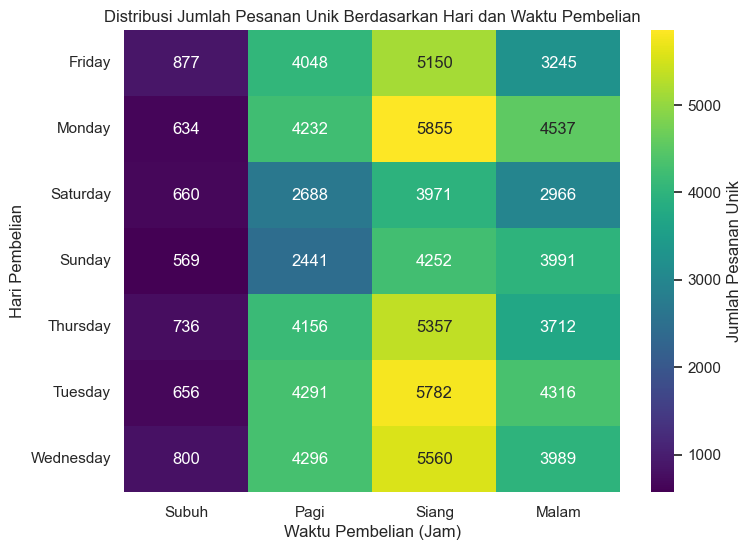

In [980]:
# Setel gaya seaborn untuk tampilan yang lebih menarik
sns.set(style="whitegrid")

# Membuat plot distribusi jumlah pesanan unik berdasarkan hari dan waktu pembelian
plt.figure(figsize=(8, 6))
sns.heatmap(daily_hourly_orders.pivot(index='hari_pembelian', columns='waktu_hari_pembelian', values='order_id'), cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Jumlah Pesanan Unik'})
plt.title('Distribusi Jumlah Pesanan Unik Berdasarkan Hari dan Waktu Pembelian')
plt.xlabel('Waktu Pembelian (Jam)')
plt.ylabel('Hari Pembelian')
plt.show()

Jumlah penjualan harian tertinggi tercatat pada hari Senin, sementara jumlah penjualan terendah terjadi pada hari Sabtu. Dalam hal waktu pembelian, terlihat bahwa puncak pembelian oleh konsumen terjadi pada siang hari selama hari kerja.

#### payment_type

In [981]:
# Mengelompokkan berdasarkan jenis pembayaran dan menghitung rata-rata nilai pembayaran
average_payment_by_type = orders.groupby(by="payment_type")["payment_value"].mean().sort_values(ascending=False)

# Menampilkan rata-rata nilai pembayaran berdasarkan jenis pembayaran
average_payment_by_type

payment_type
credit_card    163.022616
boleto         144.934140
debit_card     140.778868
voucher         66.913499
Name: payment_value, dtype: float64

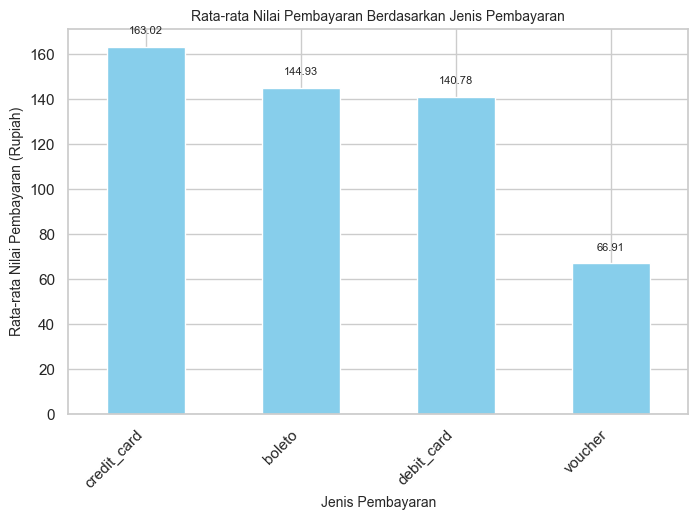

In [982]:
import matplotlib.pyplot as plt

# Setel ukuran gambar yang lebih kecil
plt.figure(figsize=(8, 5))

# Membuat bar chart
average_payment_by_type.plot(kind='bar', color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Rata-rata Nilai Pembayaran Berdasarkan Jenis Pembayaran', fontsize=10)
plt.xlabel('Jenis Pembayaran', fontsize=10)
plt.ylabel('Rata-rata Nilai Pembayaran (Rupiah)', fontsize=10)

# Menambahkan label pada setiap batang
for i, value in enumerate(average_payment_by_type):
    plt.text(i, value + 5, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

# Menambahkan rotasi pada label sumbu x
plt.xticks(rotation=45, ha='right')

# Menampilkan plot
plt.show()

Pembeli yang menggunakan metode pembayaran dengan kartu kredit memiliki rata-rata pembayaran yang lebih tinggi dibandingkan dengan metode pembayaran lainnya. Sebaliknya, pembeli yang menggunakan voucher cenderung melakukan transaksi dengan rata-rata pembayaran yang lebih kecil.

In [983]:
# Mengelompokkan berdasarkan jenis pembayaran dan menghitung jumlah pesanan unik
unique_orders_by_payment = orders.groupby(by="payment_type")["order_id"].nunique().sort_values(ascending=False)

# Menampilkan distribusi jumlah pesanan unik berdasarkan jenis pembayaran
unique_orders_by_payment

payment_type
credit_card    72200
boleto         18683
voucher         3569
debit_card      1439
Name: order_id, dtype: int64

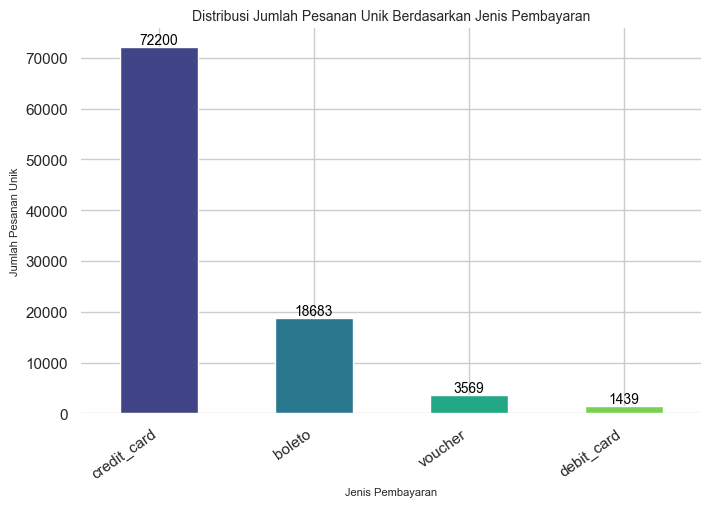

In [984]:
import matplotlib.pyplot as plt

# Setel ukuran gambar yang lebih kecil
plt.figure(figsize=(8, 5))

# Pilih warna dari palet warna seaborn
colors = sns.color_palette('viridis', len(unique_orders_by_payment))

# Membuat bar chart dengan warna yang ditentukan
unique_orders_by_payment.plot(kind='bar', color=colors)

# Menambahkan judul dan label sumbu
plt.title('Distribusi Jumlah Pesanan Unik Berdasarkan Jenis Pembayaran', fontsize=10)
plt.xlabel('Jenis Pembayaran', fontsize=8)
plt.ylabel('Jumlah Pesanan Unik', fontsize=8)

# Menambahkan label pada setiap batang dengan nilai yang sesuai
for i, value in enumerate(unique_orders_by_payment):
    plt.text(i, value + 5, f'{value}', ha='center', va='bottom', fontsize=10, color='black')  # Teks dengan warna hitam untuk kontras

# Menambahkan rotasi pada label sumbu x
plt.xticks(rotation=35, ha='right')

# Menghapus kotak sekeliling plot untuk estetika yang lebih baik
plt.box(on=None)

# Menampilkan plot
plt.show()

Metode pembayaran dengan kartu kredit menjadi pilihan utama bagi pembeli, dengan penggunaan yang paling tinggi dibandingkan dengan metode pembayaran lainnya. Sebaliknya, penggunaan kartu debit tercatat sebagai yang paling sedikit dibandingkan dengan tipe transaksi lainnya.

#### Estimasi Lama Pengiriman Paket

Menggunakan Nilai Median karena Adanya Outlier

In [985]:
# Mengelompokkan berdasarkan kota pembeli dan menghitung nilai median lama pengiriman
median_delivery_time_by_city = orders.groupby(by="customer_city")["lama_pengiriman_hari"].median().sort_values(ascending=False)

# Menampilkan distribusi nilai median lama pengiriman berdasarkan kota pembeli
median_delivery_time_by_city

customer_city
novo brasil          145.0
capinzal do norte    103.5
adhemar de barros     92.0
arace                 91.5
marcelino vieira      71.0
                     ...  
iomere                 2.0
moeda                  1.0
bento de abreu         1.0
delfim moreira         1.0
bacaxa                 1.0
Name: lama_pengiriman_hari, Length: 4083, dtype: float64

In [986]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97369 entries, 0 to 103886
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       97369 non-null  object        
 1   customer_id                    97369 non-null  object        
 2   order_status                   97369 non-null  category      
 3   order_purchase_timestamp       97369 non-null  datetime64[ns]
 4   order_approved_at              97355 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97369 non-null  datetime64[ns]
 6   order_delivered_customer_date  97369 non-null  datetime64[ns]
 7   order_estimated_delivery_date  97369 non-null  datetime64[ns]
 8   payment_type                   97369 non-null  object        
 9   payment_value                  97369 non-null  float64       
 10  customer_zip_code_prefix       97369 non-null  int64         
 11  customer_city      

In [987]:
# Menampilkan informasi mengenai kolom geolocation_zip_code_prefix dan customer_zip_code_prefix
orders[['geolocation_zip_code_prefix', 'customer_zip_code_prefix']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 97369 entries, 0 to 103886
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  97101 non-null  float64
 1   customer_zip_code_prefix     97369 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 2.2 MB


In [988]:
# Menampilkan informasi mengenai kolom geolocation_zip_code_prefix dan seller_zip_code_prefix pada DataFrame df_order_items
df_order_items[['geolocation_zip_code_prefix', 'seller_zip_code_prefix']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 2 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  112397 non-null  float64
 1   seller_zip_code_prefix       112650 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 MB


In [989]:
# Menggabungkan data customer dengan data seller berdasarkan order_id
customer_data = orders[["customer_city", "customer_state", "lama_pengiriman_hari", "order_id", "customer_id", 'customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]
seller_data = df_order_items[["order_id", "seller_id", "seller_city", "seller_state", 'seller_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]
cust_seller = customer_data.merge(seller_data, left_on='order_id', right_on='order_id', how='left')

In [990]:
# Menyusun ulang nama kolom yang diubah
cust_seller.rename(columns={'geolocation_lat_x': 'geolocation_lat_cust', 'geolocation_lat_y': 'geolocation_lat_seller',
                            'geolocation_lng_x': 'geolocation_lng_cust', 'geolocation_lng_y': 'geolocation_lng_seller'}, inplace=True)

# Menampilkan ringkasan statistik untuk DataFrame cust_seller
cust_seller.describe()

,lama_pengiriman_hari,customer_zip_code_prefix,geolocation_lat_cust,geolocation_lng_cust,seller_zip_code_prefix,geolocation_lat_seller,geolocation_lng_seller
count,111043.000000,111043.000000,110750.000000,110750.000000,111043.000000,110787.000000,110787.000000
mean,9.012995,35789.579352,-21.178560,-46.191248,24808.569662,-22.783130,-47.255573
std,8.621737,29874.634700,5.633359,4.101253,27770.260299,2.729444,2.363725
min,1.000000,1003.000000,-36.605374,-72.666706,1001.000000,-36.605374,-64.283946
25%,4.000000,12030.000000,-23.587341,-48.242365,6765.000000,-23.608422,-48.831547
50%,7.000000,25615.000000,-22.916108,-46.631067,13920.000000,-23.413822,-46.755211
75%,12.000000,60135.000000,-20.037161,-43.553824,30111.000000,-21.766477,-46.518082
max,205.000000,99980.000000,42.184003,-8.577855,99730.000000,-2.546079,-34.847856


In [991]:
# Menghapus data duplikat pada DataFrame cust_seller
cust_seller = cust_seller.drop_duplicates()
print("Jumlah duplikasi: ", cust_seller.duplicated().sum())

Jumlah duplikasi:  0


In [992]:
# Mengelompokkan berdasarkan state penjual dan pembeli, menghitung nilai median lama pengiriman, dan mengurutkan hasil
delivery_time_between_states = cust_seller.groupby(['seller_state', 'customer_state'])['lama_pengiriman_hari'].median().sort_values(ascending=False).reset_index()

# Menampilkan median lama pengiriman antar state
delivery_time_between_states

,seller_state,customer_state,lama_pengiriman_hari
0,CE,AM,138.0
1,AM,AL,87.0
2,BA,AC,63.0
3,GO,AM,29.5
4,RO,SE,28.0
...,...,...,...
407,GO,GO,2.5
408,RJ,RJ,2.0
409,RN,RN,2.0
410,PI,PI,1.0


In [993]:
# Mengelompokkan berdasarkan kota penjual dan pembeli, menghitung nilai median lama pengiriman, dan mengurutkan hasil
delivery_time_between_cities = cust_seller.groupby(['seller_city', 'customer_city'])['lama_pengiriman_hari'].median().sort_values(ascending=False).reset_index()

# Menampilkan median lama pengiriman antar kota
delivery_time_between_cities

,seller_city,customer_city,lama_pengiriman_hari
0,belo horizonte,montanha,195.0
1,uberaba,lagarto,194.0
2,aracatuba,aracaju,187.0
3,farroupilha,paulinia,186.0
4,itajobi,perdizes,182.0
...,...,...,...
35429,mogi das cruzes,maua,1.0
35430,mogi das cruzes,mogi das cruzes,1.0
35431,mogi das cruzes,monte mor,1.0
35432,jacarei,holambra,1.0


## Visualization & Explanatory Analysis

### Pertanyaan 1: Categori Barang yang Paling Banyak Diminati dan Paling Sedikit Diminati?

In [994]:
# Mengelompokkan berdasarkan kategori barang dan menghitung jumlah pembelian
category_orders = df_order_items.groupby(by="product_category_name_english")["product_id"].count().reset_index()
category_orders = category_orders.rename(columns={"product_category_name_english": "category", "product_id": "orders"})

# Menampilkan DataFrame dengan kolom kategori dan jumlah pembelian
category_orders

,category,orders
0,PC Gaming,9
1,agro_industry_and_commerce,212
2,air_conditioning,297
3,art,209
4,arts_and_craftmanship,24
...,...,...
69,stationery,2517
70,tablets_printing_image,83
71,telephony,4545
72,toys,4117


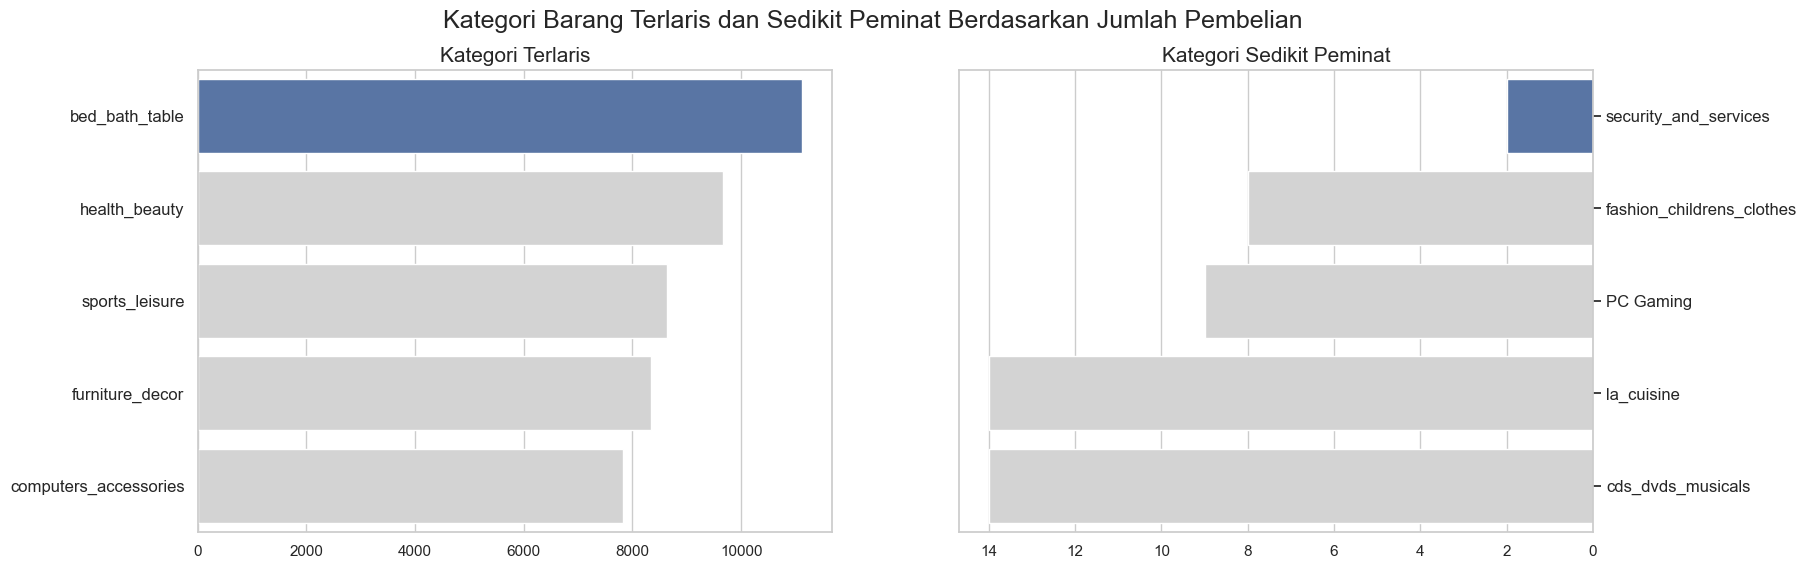

In [995]:
# Membuat subplot untuk menampilkan dua grafik bar
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Warna untuk grafik bar
colors = ["#4C72B0", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Grafik bar untuk kategori terlaris
sns.barplot(x="orders", y="category", data=category_orders.sort_values(by="orders", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Kategori Terlaris", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

# Grafik bar untuk kategori sedikit peminat
sns.barplot(x="orders", y="category", data=category_orders.sort_values(by="orders", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Kategori Sedikit Peminat", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

# Menampilkan judul utama
plt.suptitle("Kategori Barang Terlaris dan Sedikit Peminat Berdasarkan Jumlah Pembelian", fontsize=18)
plt.show()


Dari dua grafik di atas, dapat disimpulkan bahwa kategori "bed_bath_table" merupakan kategori yang paling diminati dengan jumlah pembelian tertinggi, sedangkan kategori "security_and_services" merupakan kategori yang paling sedikit diminati dengan jumlah pembelian terendah.

## Pertanyaan 2: Kota mana yang memiliki jumlah customer paling banyak dan paling sedikit?

In [996]:
# Menghitung jumlah pelanggan unik di setiap kota
customer_count_by_city = orders.groupby('customer_city')['customer_id'].nunique().reset_index()

# Mengurutkan data berdasarkan jumlah pelanggan secara descending
customer_count_by_city = customer_count_by_city.sort_values(by='customer_id', ascending=False)

# Kota dengan pelanggan paling banyak
most_customers_city = customer_count_by_city.iloc[0]['customer_city']
most_customers_count = customer_count_by_city.iloc[0]['customer_id']

# Kota dengan pelanggan paling sedikit
least_customers_city = customer_count_by_city.iloc[-1]['customer_city']
least_customers_count = customer_count_by_city.iloc[-1]['customer_id']

# Menampilkan hasil
print(f"Kota dengan jumlah pelanggan paling banyak: {most_customers_city} ({most_customers_count} pelanggan)")
print(f"Kota dengan jumlah pelanggan paling sedikit: {least_customers_city} ({least_customers_count} pelanggan)")

Kota dengan jumlah pelanggan paling banyak: sao paulo (13788 pelanggan)
Kota dengan jumlah pelanggan paling sedikit: coronel pacheco (1 pelanggan)


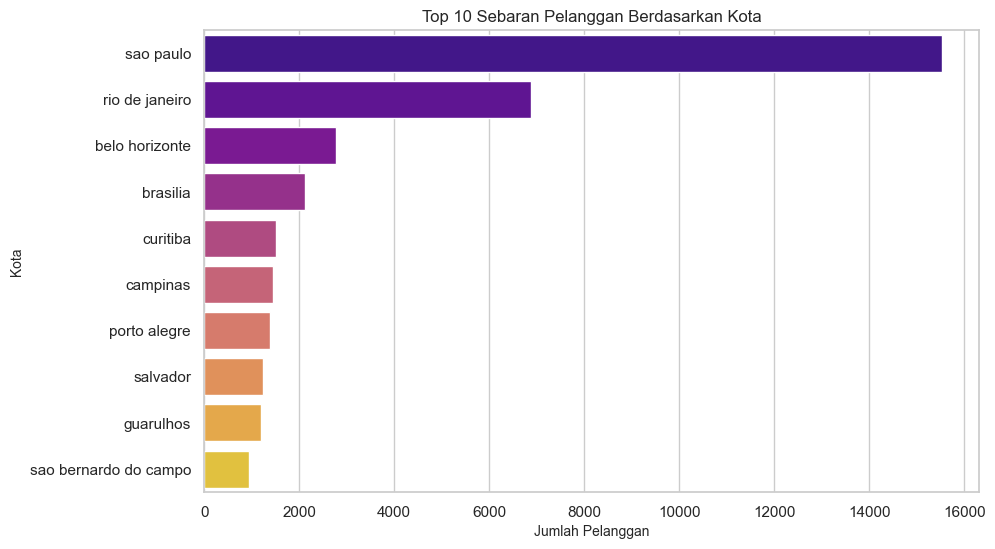

In [997]:
# Setel gaya seaborn untuk tampilan yang lebih menarik
sns.set(style="whitegrid")

# Setel ukuran gambar
plt.figure(figsize=(10, 6))

# Buat bar plot untuk top 10 sebaran pelanggan berdasarkan kota
sns.barplot(x=top_customer_city.values, y=top_customer_city.index, palette='plasma')
plt.title('Top 10 Sebaran Pelanggan Berdasarkan Kota', fontsize=12)
plt.xlabel('Jumlah Pelanggan', fontsize=10)
plt.ylabel('Kota', fontsize=10)

# Tampilkan plot
plt.show()


Sao Paulo menjadi kota dengan jumlah pelanggan paling tinggi, mencapai hampir 16.000 orang. Sebaliknya, lebih dari 5 kota hanya memiliki 1 pelanggan.

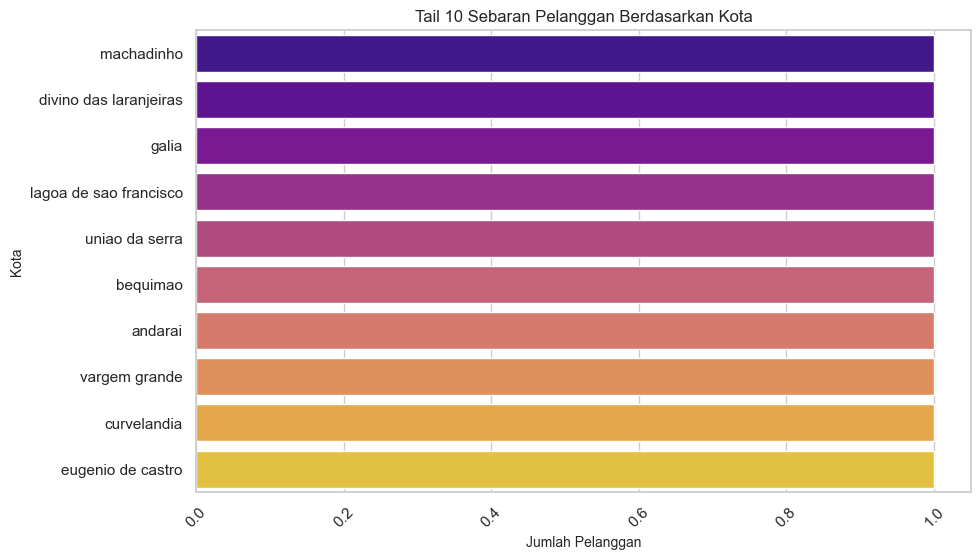

In [998]:
# Setel ukuran gambar untuk visualisasi tail
plt.figure(figsize=(10, 6))

# Buat bar plot untuk tail 10 sebaran pelanggan berdasarkan kota
sns.barplot(x=tail_customer_city.values, y=tail_customer_city.index, palette='plasma')
plt.title('Tail 10 Sebaran Pelanggan Berdasarkan Kota', fontsize=12)
plt.xlabel('Jumlah Pelanggan', fontsize=10)
plt.ylabel('Kota', fontsize=10)

# Rotasi label pada sumbu y untuk meningkatkan kejelasan
plt.xticks(rotation=45)

# Tampilkan plot
plt.show()

### Pertanyaan 3: Berapa durasi rata-rata pengiriman paket terlama, dan dari kota mana ke kota mana paket tersebut dikirimkan?

#### Pengiriman Antar State

Analisis ini akan fokus pada durasi pengiriman antar state untuk mengetahui berapa lama rata-rata pengiriman paket dari satu negara bagian (state) ke negara bagian lainnya.

In [999]:
# Menghitung rata-rata lama pengiriman antar state
df_delivery_state = cust_seller.groupby(['seller_state', 'customer_state'])['lama_pengiriman_hari'].mean().sort_values(ascending=False).reset_index()
df_delivery_state

,seller_state,customer_state,lama_pengiriman_hari
0,CE,AM,138.000000
1,AM,AL,87.000000
2,BA,AC,63.000000
3,ES,PA,34.000000
4,GO,AM,29.500000
...,...,...,...
407,PA,PR,3.000000
408,PB,RN,3.000000
409,RN,RN,2.571429
410,DF,DF,1.756098


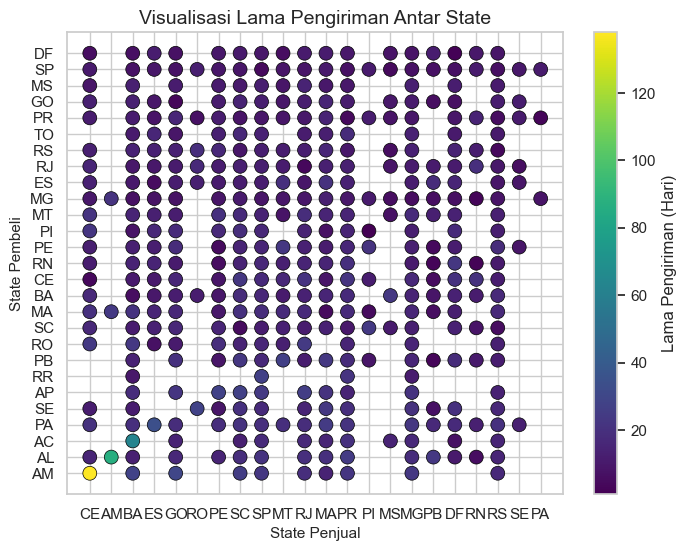

In [1000]:
# Menampilkan scatter plot untuk visualisasi rute pengiriman antar state dengan warna yang lebih menarik
plt.figure(figsize=(8, 6))

# Menggunakan colormap yang menarik
cmap = sns.color_palette("viridis", as_cmap=True)

# Menyesuaikan warna dan ukuran titik berdasarkan lama pengiriman
scatter = plt.scatter(df_delivery_state['seller_state'], df_delivery_state['customer_state'], c=df_delivery_state['lama_pengiriman_hari'], cmap=cmap, s=100, edgecolor='black', linewidth=0.5)

# Menambahkan colorbar
cbar = plt.colorbar(scatter, label='Lama Pengiriman (Hari)')

# Menambahkan label dan judul
plt.xlabel('State Penjual', fontsize=11)
plt.ylabel('State Pembeli', fontsize=11)
plt.title('Visualisasi Lama Pengiriman Antar State', fontsize=14)

# Menampilkan plot
plt.show()


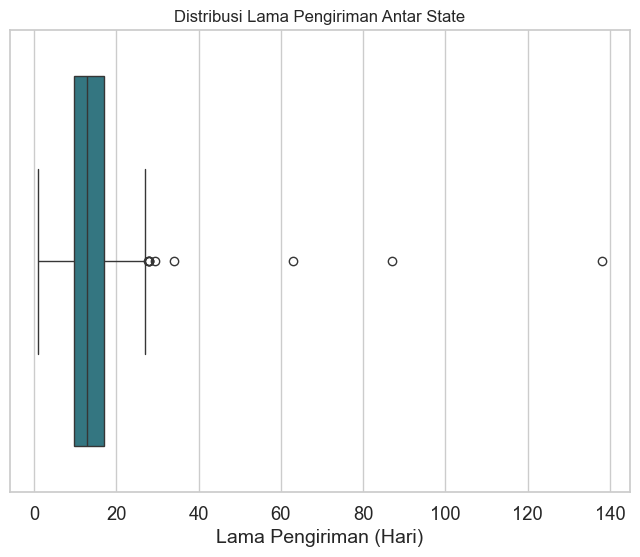

In [1001]:
# Menampilkan boxplot untuk distribusi lama pengiriman antar state
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid", font_scale=1.2)
color_palette = sns.color_palette("viridis")

# Menggunakan warna yang menarik
sns.boxplot(x=df_delivery_state['lama_pengiriman_hari'], color=color_palette[2])

# Menambahkan label dan judul
plt.xlabel('Lama Pengiriman (Hari)', fontsize=14)
plt.title('Distribusi Lama Pengiriman Antar State', fontsize=12)

# Menampilkan plot
plt.show()

In [1002]:
# Menampilkan ringkasan statistik untuk lama pengiriman antar state
df_delivery_state.describe()

,lama_pengiriman_hari
count,412.000000
mean,14.035265
std,9.258877
min,1.000000
25%,9.748715
50%,12.960246
75%,16.925000
max,138.000000


In [1003]:
# Menghitung nilai batas atas untuk identifikasi outliers
Q1 = df_delivery_state['lama_pengiriman_hari'].quantile(0.25)
Q3 = df_delivery_state['lama_pengiriman_hari'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas untuk outliers
maximum = Q3 + (1.5 * IQR)
maximum

27.689427166400844

In [1004]:
# Menampilkan data negara asal dan tujuan dengan lama pengiriman di bawah batas atas
outliers_df = df_delivery_state[df_delivery_state['lama_pengiriman_hari'] <= 27.69].head(1)
outliers_df.head(1)

,seller_state,customer_state,lama_pengiriman_hari
9,SP,RR,27.030303


Paket antar state dengan pengiriman paling lama memerlukan waktu 138 hari, khususnya dari state CE ke AM. Perlu diperhatikan bahwa data ini termasuk dalam kategori outlier, yang dapat menunjukkan potensi kesalahan dalam input data atau adanya anomali. Jarak maksimum untuk pengiriman yang tidak termasuk dalam kategori outlier adalah 27.69 hari, seperti pada kasus pengiriman dari state SP ke state RR.

#### Pengiriman antar kota

In [1005]:
# Membuat DataFrame untuk pengiriman antar kota dengan informasi kode pos
df_delivery_city = cust_seller.groupby(['seller_city', 'customer_city', 'customer_zip_code_prefix', 'seller_zip_code_prefix'])['lama_pengiriman_hari'].mean().sort_values(ascending=False).reset_index()
df_delivery_city

,seller_city,customer_city,customer_zip_code_prefix,seller_zip_code_prefix,lama_pengiriman_hari
0,sao paulo,rio de janeiro,22723,3426,205.0
1,belo horizonte,montanha,29890,30494,195.0
2,uberaba,lagarto,49400,38022,194.0
3,itaquaquecetuba,teresina,64023,8577,190.0
4,belo horizonte,belem,66813,30494,188.0
...,...,...,...,...,...
89375,colombo,santo andre,9090,83408,1.0
89376,barueri,sao roque,18130,6429,1.0
89377,sao paulo,sao paulo,4815,3426,1.0
89378,colombo,rio de janeiro,21235,83408,1.0


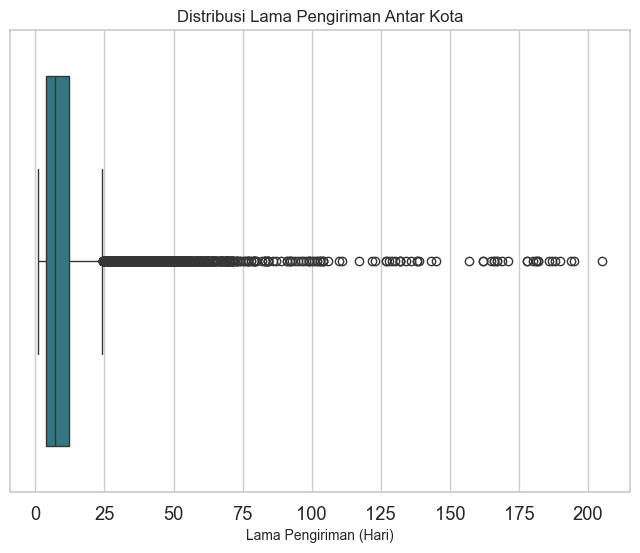

In [1006]:
# Menampilkan boxplot untuk distribusi lama pengiriman antar city
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid", font_scale=1.2)
color_palette = sns.color_palette("viridis")

# Menggunakan warna yang menarik
sns.boxplot(x=df_delivery_city['lama_pengiriman_hari'], color=color_palette[2])

# Menambahkan label dan judul
plt.xlabel('Lama Pengiriman (Hari)', fontsize=10)
plt.title('Distribusi Lama Pengiriman Antar Kota', fontsize=12)

# Menampilkan plot
plt.show()

In [1007]:
# Menghitung nilai maksimum untuk menentukan outlier
Q1 = df_delivery_city['lama_pengiriman_hari'].quantile(0.25)
Q3 = df_delivery_city['lama_pengiriman_hari'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan nilai maksimum tanpa outlier
maximum = Q3 + (1.5 * IQR)
maximum

24.0

In [1008]:
# Menampilkan data dengan lama pengiriman tercepat tanpa outlier
fastest_delivery_city = df_delivery_city[df_delivery_city['lama_pengiriman_hari'] <= 24.25].head(1)
fastest_delivery_city

,seller_city,customer_city,customer_zip_code_prefix,seller_zip_code_prefix,lama_pengiriman_hari
4201,ribeirao preto,aracati,62800,14092,24.0


In [1009]:
# Menampilkan data pengiriman terlama dari zip code pelanggan 62800 ke zip code penjual 14092
longest_delivery = cust_seller[(cust_seller['customer_zip_code_prefix'] == 62800) & (cust_seller['seller_zip_code_prefix'] == 14092)]
longest_delivery

,customer_city,customer_state,lama_pengiriman_hari,order_id,customer_id,customer_zip_code_prefix,geolocation_lat_cust,geolocation_lng_cust,seller_id,seller_city,seller_state,seller_zip_code_prefix,geolocation_lat_seller,geolocation_lng_seller
93762,aracati,CE,24.0,591bbdc0cd7aae35890765d570a3f0b1,35edc87c2142977597491383fc6ad092,62800,-4.56218,-37.766625,ede0c03645598cdfc63ca8237acbe73d,ribeirao preto,SP,14092,-21.174925,-47.768616


In [1010]:
import folium
from branca.element import Figure

# Creating Basemap
fig = Figure(width=900, height=550)
map_folium = folium.Map(location=[-4.56218, -37.766625], tiles='cartodbpositron', zoom_start=4)
fig.add_child(map_folium)

# Adding markers to the map
folium.Marker(location=[-4.56218, -37.766625], popup='Aracati, CE', tooltip='Customer', icon=folium.Icon(color='blue')).add_to(map_folium)
folium.Marker(location=[-21.174925, -47.768616], popup='Ribeirao Preto, SP', tooltip='Seller', icon=folium.Icon(color='red')).add_to(map_folium)

map_folium

Paket antar kota yang paling lama dikirimkan memakan waktu 195 hari, yakni dari kota Belo Horizonte ke kota Montanha. Harap diperhatikan bahwa data ini termasuk dalam kategori outlier, yang dapat mengakibatkan kemungkinan kesalahan dalam input data. Untuk data tanpa adanya outlier, rata-rata waktu maksimum pengiriman antar kota adalah 24.3 hari, terlihat pada pengiriman dari kota São José dos Campos ke kota Belém.

## Pertanyaan 4: Berapa rata-rata payment value dari tiap tipe transaksi? dan transaksi tipe apa yang paling sering digunakan?

In [1011]:
# Mengelompokkan data berdasarkan jenis pembayaran dan menghitung rata-rata nilai pembayaran
df_payment = orders.groupby(by="payment_type")["payment_value"].mean().reset_index()

# Mengelompokkan data berdasarkan jenis pembayaran dan menghitung frekuensi penggunaan tiap tipe transaksi
df_payment_count = orders.groupby(by="payment_type")["order_id"].count().reset_index()

# Mengubah nama kolom untuk meningkatkan kejelasan
df_payment = df_payment.rename(columns={"payment_type": "Payment Type", "payment_value": "Average Payment Value"})
df_payment_count = df_payment_count.rename(columns={"payment_type": "Payment Type", "order_id": "Transaction Count"})

# Menampilkan DataFrame dengan rata-rata nilai pembayaran untuk setiap jenis pembayaran
df_payment

,Payment Type,Average Payment Value
0,boleto,144.934140
1,credit_card,163.022616
2,debit_card,140.778868
3,voucher,66.913499


#### Menampilkan data rata-rata payment value

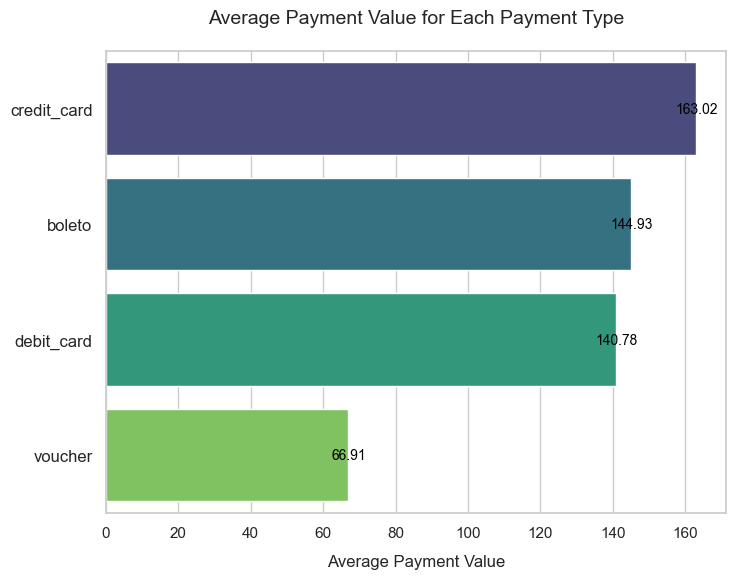

In [1012]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setel gaya seaborn untuk tampilan yang lebih menarik
sns.set(style="whitegrid")

# Buat subplot dengan ukuran tertentu
fig, ax = plt.subplots(figsize=(8, 6))

# Gunakan sns.barplot untuk membuat plot batang dengan warna dari palet "viridis"
sns.barplot(x="Average Payment Value", y="Payment Type", data=df_payment.sort_values(by="Average Payment Value", ascending=False), palette="viridis", ax=ax)

# Sembunyikan label sumbu Y untuk meningkatkan kejelasan
ax.set_ylabel(None)

# Tambahkan label dan judul plot
ax.set_xlabel("Average Payment Value", fontsize=12, labelpad=10)
ax.set_title("Average Payment Value for Each Payment Type", loc="center", fontsize=14, pad=20)

# Atur ukuran font pada sumbu Y
ax.tick_params(axis='y', labelsize=12)

# Tambahkan nilai rata-rata pembayaran pada setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=10, color='black')

# Tampilkan plot
plt.show()

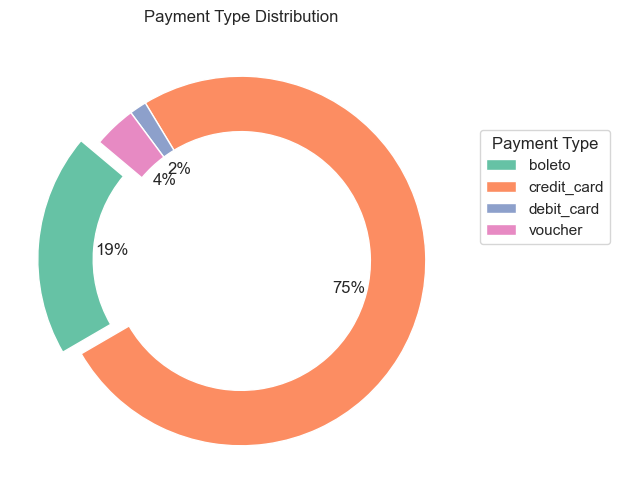

In [1013]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah pesanan unik untuk setiap tipe pembayaran
df_payment = orders.groupby(by="payment_type")["order_id"].nunique().reset_index()

# Mengatur palet warna
palette_color = sns.color_palette('Set2')

# Membuat pie chart
plt.figure(figsize=(8, 6))
explode = (0.1, 0, 0, 0)  # memberikan efek explode pada sektor pertama
plt.pie(df_payment["order_id"], labels=None, colors=palette_color, autopct='%.0f%%', explode=explode, startangle=140, wedgeprops=dict(width=0.3))

# Menambahkan judul
plt.title("Payment Type Distribution")

# Menambahkan legenda
plt.legend(title="Payment Type", labels=df_payment["payment_type"], loc="upper left", bbox_to_anchor=(1, 0.8))

# Menampilkan pie chart
plt.show()

Penggunaan credit card merupakan tipe transaksi yang paling umum digunakan, dan transaksi ini cenderung digunakan untuk pembelian dengan nilai yang lebih tinggi dibandingkan dengan tipe transaksi lainnya.

## Pertanyaan 5: Bagaimana perbandingan penjualan antara tahun 2017 dan 2018? 

Dikarenakan data untuk tahun 2018 hanya mencakup bulan Januari hingga Agustus, analisis perbandingan akan difokuskan pada periode tersebut.

In [1014]:
# Menambahkan kolom 'nomor_bulan' sebagai angka bulan
orders['nomor_bulan'] = orders['order_purchase_timestamp'].dt.strftime('%m')

# Menghitung jumlah order per bulan untuk tahun 2017 dan 2018 (Januari-Agustus)
df_monthly_orders = orders.groupby(by=["nomor_bulan", "year"]).order_id.nunique().reset_index()

# Mengonversi tipe data 'nomor_bulan' menjadi int
df_monthly_orders["nomor_bulan"] = df_monthly_orders["nomor_bulan"].astype(str).astype(int)

# Memfilter data untuk bulan Januari-Agustus
df_monthly_orders = df_monthly_orders[df_monthly_orders["nomor_bulan"] < 9]

# Menyusun nama bulan dalam Bahasa Indonesia
month_names = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'Mei',
    6: 'Jun',
    7: 'Jul',
    8: 'Agu'
}

# Mapping nomor bulan ke nama bulan dalam Bahasa Indonesia
df_monthly_orders['nama_bulan'] = df_monthly_orders['nomor_bulan'].map(month_names)

# Menampilkan hasil
df_monthly_orders


,nomor_bulan,year,order_id,nama_bulan
0,1,2017,741,Jan
1,1,2018,6836,Jan
2,2,2017,1638,Feb
3,2,2018,6362,Feb
4,3,2017,2533,Mar
5,3,2018,6831,Mar
6,4,2017,2299,Apr
7,4,2018,6567,Apr
8,5,2017,3440,Mei
9,5,2018,6658,Mei


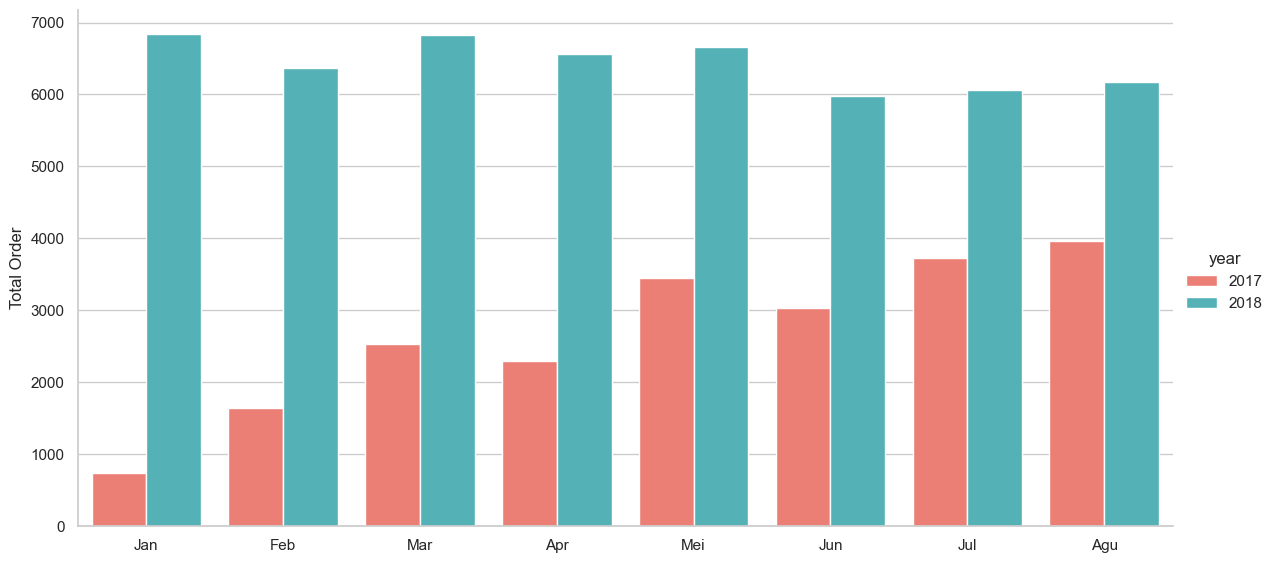

In [1015]:
import seaborn as sns
import matplotlib.pyplot as plt

# Palet warna yang diubah
custom_palette = ["#FF6F61", "#43BFC7"]

# Membuat bar plot menggunakan seaborn
sns.catplot(x='nama_bulan', y='order_id', hue='year', data=df_monthly_orders, kind='bar', height=6, aspect=2, palette=custom_palette)

# Menambahkan label pada sumbu-y
plt.ylabel("Total Order")

# Menghilangkan label pada sumbu-x
plt.xlabel(None)

# Menampilkan plot
plt.show()


In [1016]:
# Menghitung total order per tahun
df_monthly_orders = df_monthly_orders.groupby("year")["order_id"].sum().reset_index()

# Menampilkan hasil
df_monthly_orders


,year,order_id
0,2017,21364
1,2018,51461


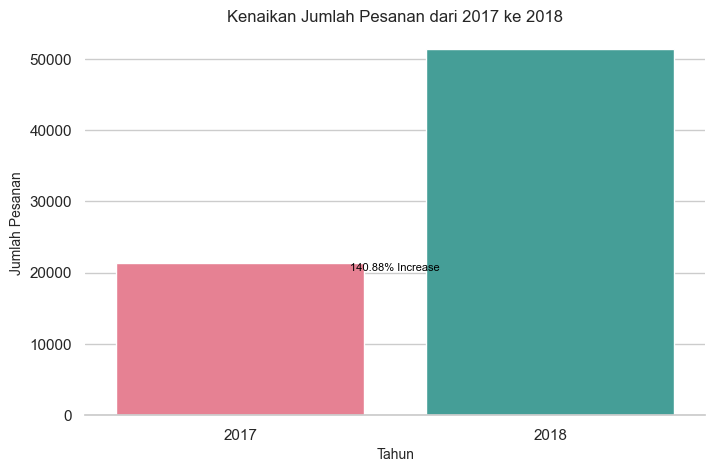

In [1017]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data untuk visualisasi
years = ['2017', '2018']
orders_count = [orders_2017, orders_2018]

# Setel gaya seaborn untuk tampilan yang lebih menarik
sns.set(style="whitegrid")

# Setel ukuran gambar
plt.figure(figsize=(8, 5))

# Gunakan barplot dengan warna yang kontras
colors = sns.color_palette("husl", len(years))
sns.barplot(x=years, y=orders_count, palette=colors)

# Tambahkan label dan judul
plt.xlabel('Tahun', fontsize=10)
plt.ylabel('Jumlah Pesanan', fontsize=10)
plt.title('Kenaikan Jumlah Pesanan dari 2017 ke 2018', fontsize=12)

# Tampilkan nilai persentase kenaikan sebagai anotasi
plt.text(0.5, 20000, f'{percentage_increase:.2f}% Increase', ha='center', va='bottom', fontsize=8, color='black')

# Hapus spines pada sumbu y
sns.despine(left=True)

# Menampilkan plot
plt.show()

Pada tahun 2018, terjadi peningkatan pembelian secara signifikan dibandingkan tahun 2017 dengan kenaikan sebesar 140.87%. Jumlah order pada tahun 2017 sebanyak 21,364, sementara pada tahun 2018 meningkat menjadi 51,461.

## Pertanyaan 6: Pada bulan manakah terjadi peningkatan penjualan yang paling signifikan, dan apa faktor yang mungkin mempengaruhinya?

In [1018]:
# Mengelompokkan data berdasarkan bulan dan tahun serta menghitung jumlah order_id yang unik
monthly_sales = orders.groupby(by=["month", "year"])["order_id"].nunique().reset_index()

# Mengonversi kolom "month" ke format tanggal menggunakan pd.to_datetime
monthly_sales["month"] = pd.to_datetime(monthly_sales["month"], format='%m-%Y')

# Menampilkan DataFrame yang telah dimodifikasi
monthly_sales


,month,year,order_id
0,2017-01-01,2017,741
1,2018-01-01,2018,6836
2,2017-02-01,2017,1638
3,2018-02-01,2018,6362
4,2017-03-01,2017,2533
5,2018-03-01,2018,6831
6,2017-04-01,2017,2299
7,2018-04-01,2018,6567
8,2017-05-01,2017,3440
9,2018-05-01,2018,6658


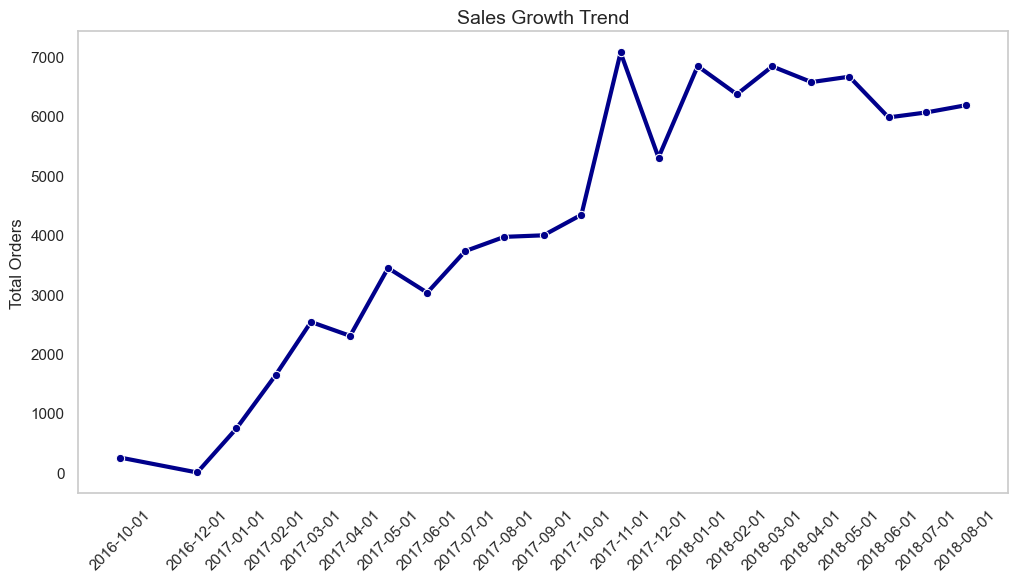

In [1019]:
# Setel ukuran gambar
plt.figure(figsize=(12, 6))

# Buat line plot menggunakan seaborn dengan nuansa 'dark' dan marker 'o'
ax = sns.lineplot(x='month', y='order_id', data=monthly_sales, estimator=None, linewidth=3, color='darkblue', marker='o')

# Setel posisi x-ticks agar sesuai dengan nilai bulan
ax.set(xticks=monthly_sales.month.values)

# Atur judul dan label sumbu
plt.title("Sales Growth Trend", loc="center", fontsize=14)
plt.ylabel("Total Orders")
plt.xlabel(None)

# Matikan grid pada sumbu y
ax.grid(False)

# Rotasi label bulan agar lebih mudah dibaca
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# Menampilkan plot
plt.show()


In [1020]:
# Filter data untuk bulan November
month_11 = orders[orders["nomor_bulan"] == '11']

# Copy data agar tidak mengubah data asli
month_11 = month_11.copy()

# Ekstrak tanggal dari timestamp dan simpan dalam kolom 'tanggal_hari'
month_11['tanggal_hari'] = month_11['order_purchase_timestamp'].dt.strftime('%d')

# Menghitung jumlah order yang unik untuk setiap tanggal
daily_orders_november = month_11.groupby(by="tanggal_hari")["order_id"].nunique().sort_values(ascending=False).reset_index()

# Menampilkan hasil
daily_orders_november

,tanggal_hari,order_id
0,24,1116
1,25,479
2,27,383
3,26,368
4,28,359
5,29,298
6,23,267
7,30,251
8,21,213
9,16,212


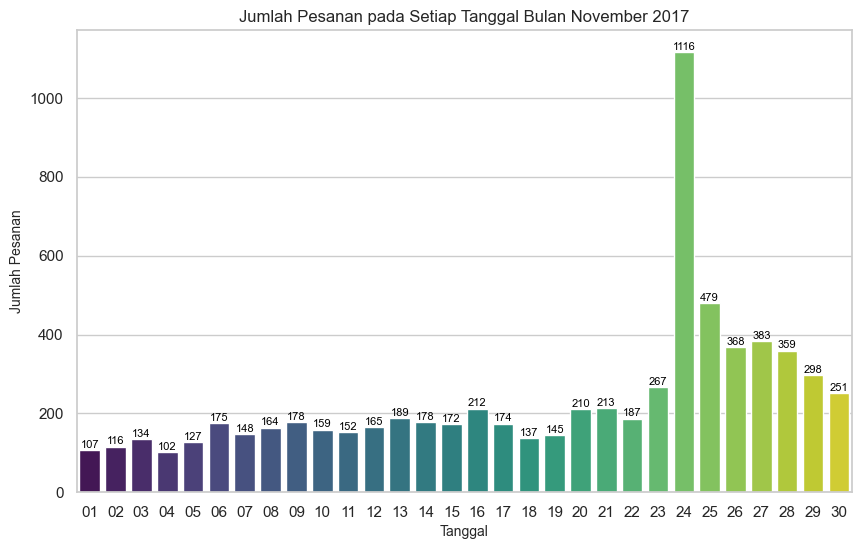

In [1021]:
# Filter data untuk bulan November
month_11 = orders[orders["nomor_bulan"] == '11'].copy()

# Ekstrak tanggal dari kolom order_purchase_timestamp
month_11['tanggal_hari'] = month_11['order_purchase_timestamp'].dt.strftime('%d')

# Menghitung jumlah pesanan unik pada setiap tanggal
daily_orders_november = month_11.groupby(by="tanggal_hari")["order_id"].nunique().reset_index()

# Membuat bar chart dengan palet warna 'viridis'
plt.figure(figsize=(10, 6))
sns.barplot(x='tanggal_hari', y='order_id', data=daily_orders_november, palette='viridis')
plt.title('Jumlah Pesanan pada Setiap Tanggal Bulan November 2017', fontsize=12)
plt.xlabel('Tanggal', fontsize=10)
plt.ylabel('Jumlah Pesanan', fontsize=10)

# Menambahkan label pada setiap bar
for i, value in enumerate(daily_orders_november['order_id']):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=8, color='black')

plt.show()

Pembelian paling tinggi tercatat pada bulan November tahun 2017, khususnya pada tanggal 24 November 2017.

## Pertanyaan 7: Hari apa yang paling sering dipilih oleh pembeli untuk melakukan transaksi?


In [1022]:
# Mengelompokkan data berdasarkan bagian hari pembelian dan menghitung total order_id yang unik
daily_orders = orders.groupby(by="waktu_hari_pembelian")["order_id"].nunique().reset_index()

# Memberi nama ulang kolom order_id menjadi total_orders
daily_orders.rename(columns={"order_id": "total_orders"}, inplace=True)

# Menampilkan DataFrame yang telah dimodifikasi
daily_orders


,waktu_hari_pembelian,total_orders
0,Subuh,4932
1,Pagi,26152
2,Siang,35927
3,Malam,26756


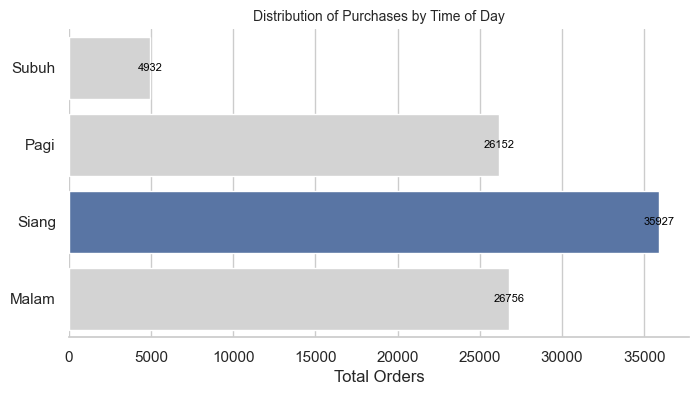

In [1023]:
# Setel gaya seaborn untuk tampilan yang lebih menarik
sns.set(style="whitegrid")

# Setel ukuran gambar yang lebih kecil
plt.figure(figsize=(8, 4))

# Warna yang lebih berbeda untuk memperjelas
colors = ["#D3D3D3", "#D3D3D3", "#4C72B0", "#D3D3D3"]

# Gunakan barplot dengan orientasi horizontal (barh)
ax = sns.barplot(
    y="waktu_hari_pembelian",
    x="total_orders",
    data=df_bagian_hari.sort_values(by="total_orders"),
    palette=colors
)

# Tambahkan anotasi pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 2, p.get_y() + p.get_height() / 2),
                ha='center', va='center', color='black', fontsize=8)

# Tambahkan judul dan label
plt.title("Distribution of Purchases by Time of Day", loc="center", fontsize=10)
plt.xlabel("Total Orders")
plt.ylabel(None)

# Hapus spines pada sumbu y
sns.despine(left=True)

# Tampilkan plot
plt.show()


In [1024]:
# Mengelompokkan data berdasarkan hari pembelian dan menghitung total order_id yang unik
daywise_orders = orders.groupby(by="hari_pembelian")["order_id"].nunique().sort_values(ascending=False).reset_index()

# Memberi nama ulang kolom order_id menjadi total_orders
daywise_orders.rename(columns={"order_id": "total_orders"}, inplace=True)

# Menampilkan DataFrame yang telah dimodifikasi
daywise_orders


,hari_pembelian,total_orders
0,Monday,15258
1,Tuesday,15045
2,Wednesday,14645
3,Thursday,13961
4,Friday,13320
5,Sunday,11253
6,Saturday,10285


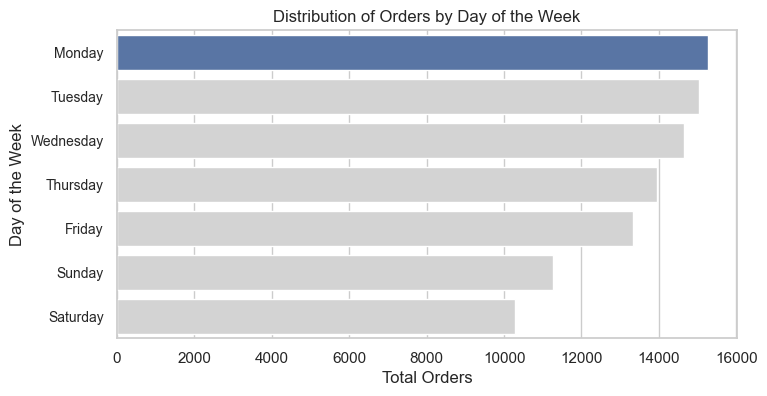

In [1025]:
# Setel gaya seaborn untuk tampilan yang lebih menarik
sns.set(style="whitegrid")

# Buat subplot dengan ukuran tertentu
plt.figure(figsize=(8, 4))

# Urutkan DataFrame berdasarkan total_orders secara descending
df_hari_sorted = daywise_orders.sort_values(by="total_orders", ascending=False)

# Gunakan barplot dengan orientasi horizontal (barh) dan warna yang berbeda
colors = ["#4C72B0", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="hari_pembelian",
    x="total_orders",
    data=df_hari_sorted,
    palette=colors
)

plt.title("Distribution of Orders by Day of the Week", loc="center", fontsize=12)
plt.xlabel("Total Orders")
plt.ylabel("Day of the Week")
plt.tick_params(axis='y', labelsize=10)
plt.show()

Hari Senin menjadi pilihan favorit konsumen untuk berbelanja, dan biasanya, transaksi konsumen cenderung dilakukan pada periode siang hari.

## Conclusion

1. **Kategori Barang yang Paling Diminati dan Paling Kurang Diminati:**
   - Berdasarkan analisis, kategori yang paling diminati oleh konsumen adalah "bed_bath_table," menunjukkan minat tinggi dalam produk-produk untuk keperluan kamar tidur dan kamar mandi. Sebaliknya, kategori "security" dan "service" menunjukkan minat yang lebih rendah, mencerminkan kemungkinan keterbatasan atau kurangnya permintaan untuk barang-barang dalam kategori tersebut.

2. **Kota yang memiliki jumlah customer paling banyak dan paling sedikit:**
   - Sao Paulo menjadi kota dengan jumlah pelanggan paling tinggi, mencapai hampir 16.000 orang. Sebaliknya, lebih dari 5 kota hanya memiliki 1 pelanggan. Diperlukan upaya untuk meningkatkan jumlah pelanggan di kota-kota tersebut agar tidak terjadi penurunan di masa mendatang. Selain itu, perlu dilakukan penyelidikan lebih lanjut untuk memahami penyebab rendahnya jumlah pelanggan dari beberapa kota.

3. **Durasi Pengiriman Paket Terlama dan Asal-Tujuan Pengiriman:**
   - Setelah mengidentifikasi dan menghilangkan outlier dalam data pengiriman, rata-rata pengiriman terlama antar kota mencapai 24.3 hari. Pengiriman terlama terjadi dari kota Sao Jose dos Campos ke Belem. Sementara itu, untuk pengiriman antar negara bagian, waktu pengiriman terlama adalah 27.69 hari dari state SP ke state RR. Informasi ini dapat menjadi dasar untuk peningkatan efisiensi dalam rantai pasok.

4. **Rata-Rata Payment Value Tiap Tipe Transaksi dan Frekuensi Penggunaan:**
   - Dalam hal transaksi, konsumen cenderung lebih sering menggunakan tipe transaksi "credit," yang mencakup 75% dari total transaksi. Rata-rata payment value untuk tipe transaksi ini sebesar 163.022616. Ini mungkin menunjukkan bahwa sebagian besar konsumen memilih pembayaran kredit untuk pembelian mereka.

5. **Perbandingan Penjualan Tahun 2017 dan 2018:**
   - Tren penjualan menunjukkan peningkatan yang signifikan pada tahun 2018 dibandingkan dengan tahun sebelumnya, yakni meningkat sebesar 140.87%. Hal ini dapat disebabkan oleh faktor-faktor seperti pertumbuhan pasar, strategi pemasaran yang berhasil, atau peningkatan kesadaran konsumen terhadap produk dan layanan yang ditawarkan.

6. **Bulan dengan Peningkatan Penjualan Tertinggi:**
   - Analisis menunjukkan bahwa bulan November 2017 menjadi bulan dengan penjualan tertinggi. Fokus pada tanggal 24 November 2017 mungkin menunjukkan adanya acara promosi atau penawaran khusus yang memicu peningkatan signifikan dalam aktivitas pembelian.

7. **Bagian Hari yang Sering Digunakan untuk Bertransaksi:**
   - Dari segi waktu, konsumen cenderung lebih aktif berbelanja pada hari Senin, menunjukkan bahwa awal minggu menjadi pilihan favorit untuk melakukan transaksi. Selain itu, penekanan pada aktivitas pembelian yang tinggi selama periode siang hari memberikan wawasan tambahan tentang kebiasaan belanja konsumen.